<a href="https://colab.research.google.com/github/Imsachin010/GDP-Analysis-with-LULC/blob/main/sif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_GSDP = pd.read_csv('/content/drive/MyDrive/IISF isro/Data/Dataset/GDP-All-States.csv')
df_GSDP

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [3]:
### Removing union territories
df_GSDP = df_GSDP.drop(['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'],axis=1)

In [6]:
# Check coulmns have all missing values and delete those columns
# We can notice that the West Bengal column has all missing values, so it will be removed
columns_all_missing = list(df_GSDP.columns[df_GSDP.isnull().all()])
df_GSDP = df_GSDP.drop(columns_all_missing,axis=1)

In [9]:
# Creating dataframe only for " % Growth over previous year"
df_percent_of_growth = df_GSDP[df_GSDP['Items  Description'] == '(% Growth over previous year)']
df_percent_of_growth

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,(% Growth over previous year),2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [10]:
# Dropping 'Items  Description' column
df_percent_of_growth = df_percent_of_growth.drop(['Items  Description'],axis=1)
df_percent_of_growth

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [11]:
# Creating 'Year' column with values 1,2,3,4,5 for each year duration for plotting the trend line
df_percent_of_growth['Year'] = [1,2,3,4,5]
df_percent_of_growth

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP,Year
6,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86,1
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97,2
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65,3
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99,4
10,2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52,5


In [12]:
# Creating list of all the states
state_list = df_percent_of_growth.columns
state_list = state_list[1:-1]
state_list

Index(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'All_India GDP'],
      dtype='object')

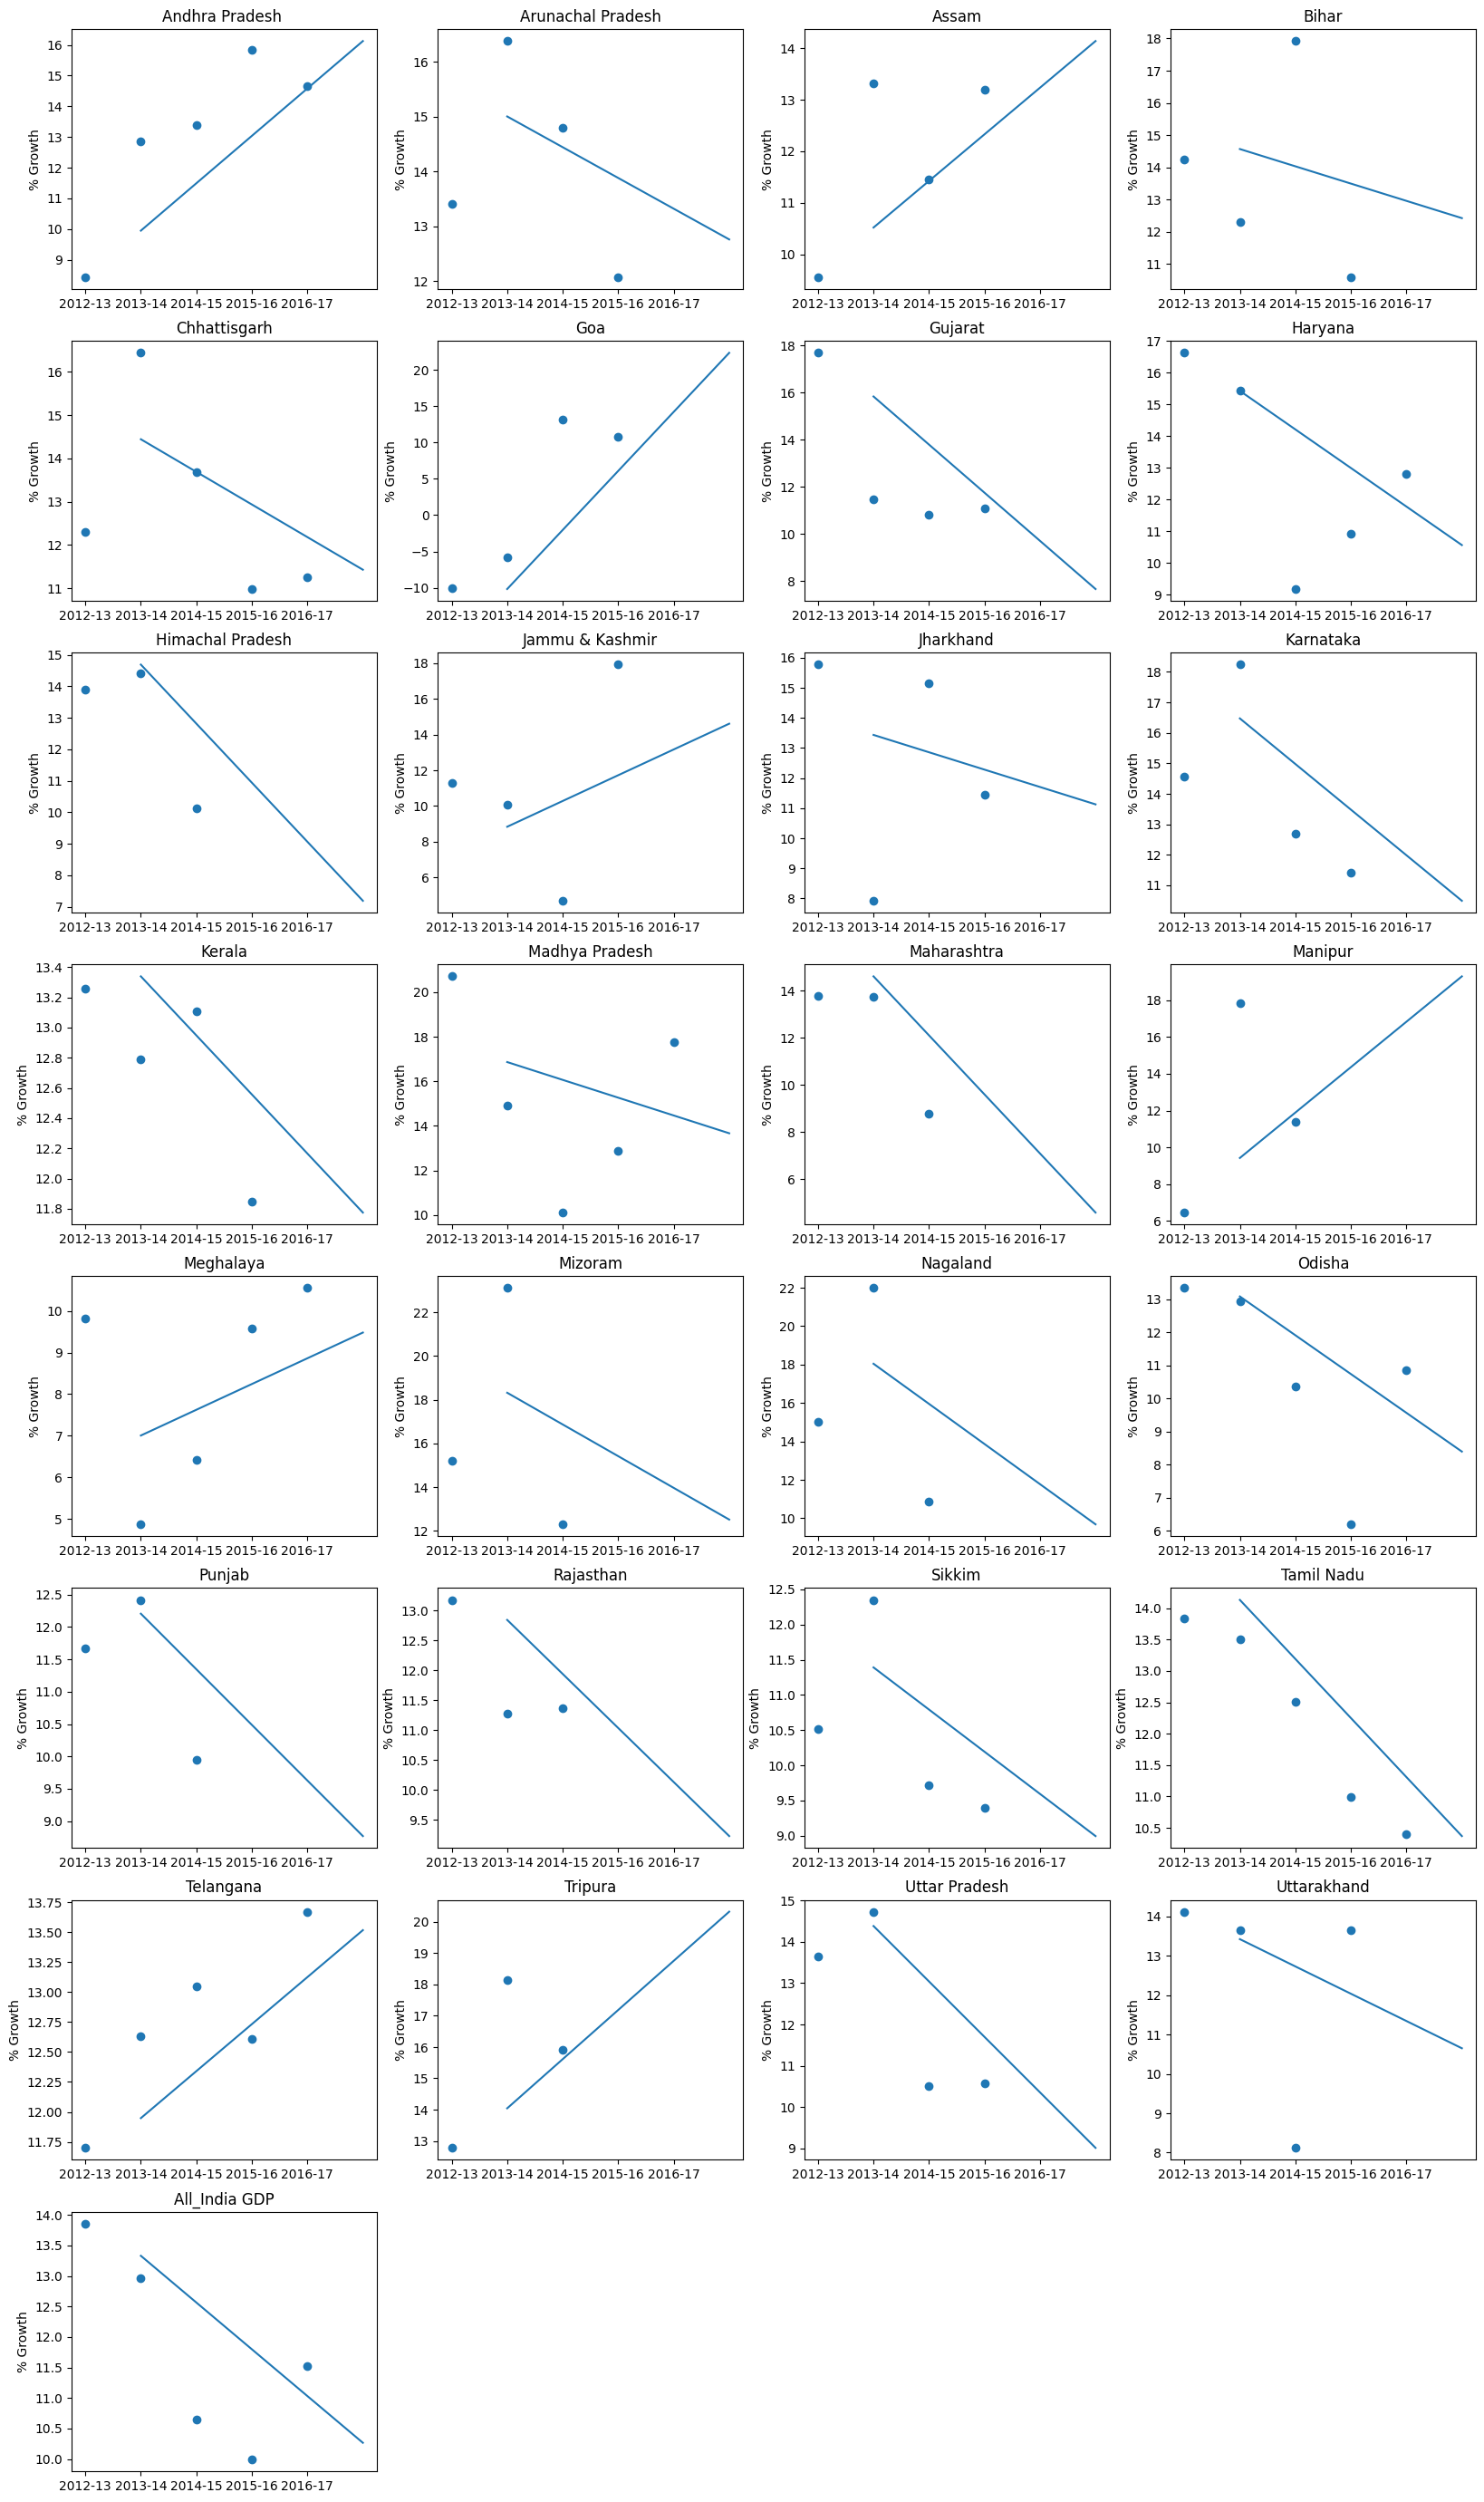

In [13]:
k=0
plt.figure(figsize=(20,35))
for i in range(len(state_list)):
    k=k+1
    plt.subplot(8, 4,k)
    # Handling the NaN values of the column by using only the finite values
    idx = np.isfinite(df_percent_of_growth['Year']) & np.isfinite(df_percent_of_growth[state_list[i]])
    # Taking slope(M) and Y axis intersection(C)
    m, c = np.polyfit(df_percent_of_growth['Year'][idx],df_percent_of_growth[state_list[i]][idx],1)
    plt.scatter(x='Duration',y=state_list[i],data=df_percent_of_growth)
    plt.plot(df_percent_of_growth['Year'],m*df_percent_of_growth['Year']+c)
    plt.title(state_list[i])
    plt.ylabel('% Growth')

In [14]:
# Dropping 'Year' column as we do not need it anymore for further analysis
df_percent_of_growth.drop('Year',axis=1,inplace=True)

# Setting 'Duration' column as index
df_percent_of_growth = df_percent_of_growth.set_index('Duration')
df_percent_of_growth

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
Duration,,,,,,,,,,,,,,,,,,,,,
2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [15]:
# Transposing the dataframe for the readablity.
df_percent_of_growth = df_percent_of_growth.transpose()
df_percent_of_growth

Duration,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,8.43,12.85,13.40,15.85,14.65
Arunachal Pradesh,13.41,16.38,14.79,12.07,NaN
Assam,9.56,13.31,11.45,13.19,NaN
Bihar,14.25,12.30,17.92,10.59,NaN
Chhattisgarh,12.30,16.44,13.69,10.98,11.26
Goa,-10.02,-5.77,13.12,10.75,NaN
Gujarat,17.69,11.47,10.82,11.09,NaN
Haryana,16.63,15.45,9.18,10.91,12.82
Himachal Pradesh,13.89,14.42,10.14,NaN,NaN
Jammu & Kashmir,11.31,10.09,4.70,17.91,NaN


In [16]:
# Adding new column 'Avg. GDP Growth'
df_percent_of_growth['Avg. GDP Growth'] = round(df_percent_of_growth.mean(axis=1),2)
df_percent_of_growth

Duration,2012-13,2013-14,2014-15,2015-16,2016-17,Avg. GDP Growth
Andhra Pradesh,8.43,12.85,13.40,15.85,14.65,13.04
Arunachal Pradesh,13.41,16.38,14.79,12.07,NaN,14.16
Assam,9.56,13.31,11.45,13.19,NaN,11.88
Bihar,14.25,12.30,17.92,10.59,NaN,13.76
Chhattisgarh,12.30,16.44,13.69,10.98,11.26,12.93
Goa,-10.02,-5.77,13.12,10.75,NaN,2.02
Gujarat,17.69,11.47,10.82,11.09,NaN,12.77
Haryana,16.63,15.45,9.18,10.91,12.82,13.00
Himachal Pradesh,13.89,14.42,10.14,NaN,NaN,12.82
Jammu & Kashmir,11.31,10.09,4.70,17.91,NaN,11.00


In [17]:
# Sorting the states by 'Avg. GDP Growth'
df_percent_of_growth = df_percent_of_growth.sort_values(by='Avg. GDP Growth')
df_percent_of_growth

Duration,2012-13,2013-14,2014-15,2015-16,2016-17,Avg. GDP Growth
Goa,-10.02,-5.77,13.12,10.75,NaN,2.02
Meghalaya,9.81,4.87,6.41,9.58,10.55,8.24
Sikkim,10.51,12.35,9.72,9.39,NaN,10.49
Odisha,13.34,12.95,10.37,6.19,10.85,10.74
Jammu & Kashmir,11.31,10.09,4.70,17.91,NaN,11.00
Punjab,11.67,12.42,9.95,NaN,NaN,11.35
All_India GDP,13.86,12.97,10.65,9.99,11.52,11.80
Assam,9.56,13.31,11.45,13.19,NaN,11.88
Manipur,6.45,17.83,11.39,NaN,NaN,11.89
Rajasthan,13.18,11.27,11.37,NaN,NaN,11.94


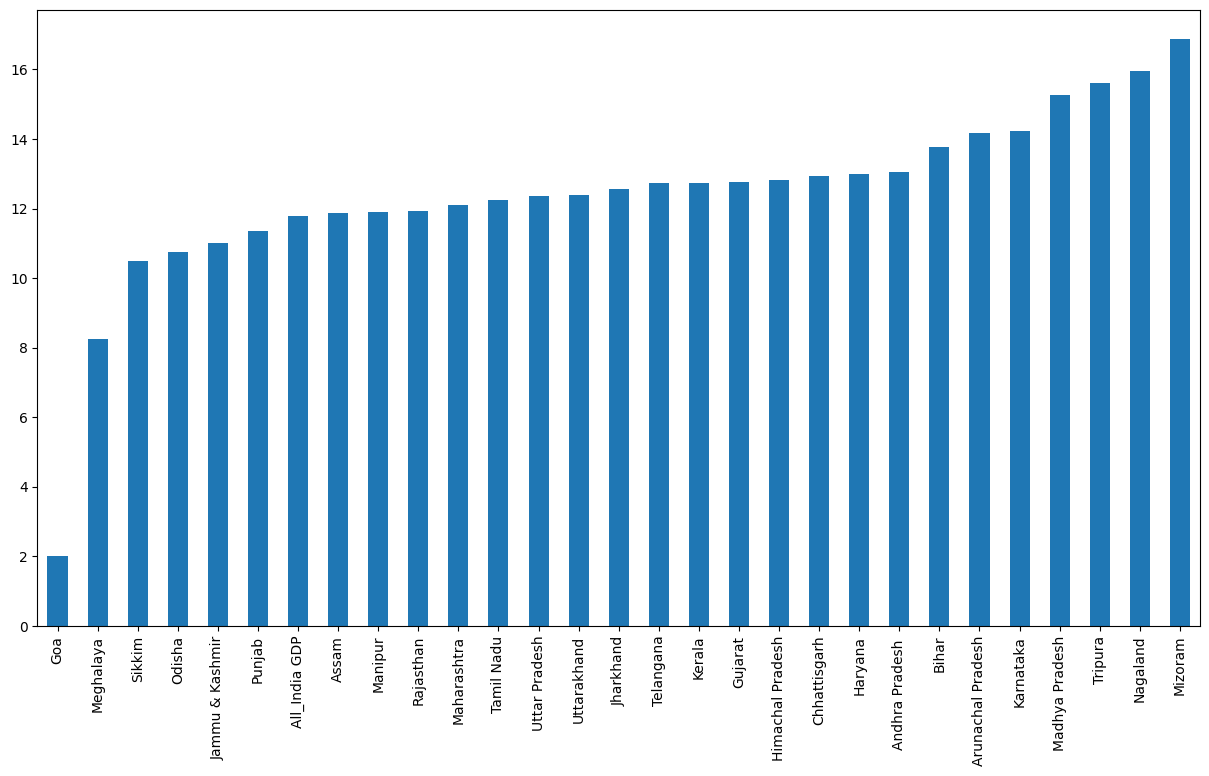

In [18]:
# Plotting 'Avg. GDP Growth' for all the states
plt.figure(figsize=(15,8))
df_percent_of_growth['Avg. GDP Growth'].plot(kind='bar',)
plt.show()

# **Total GDP of the states for the year 2015-16**

In [19]:
# Creating dataframe only with GDP of the states for the year 2015-16
df_GSDP_2015_16 = df_GSDP[(df_GSDP['Duration']=='2015-16') & (df_GSDP['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)')]
df_GSDP_2015_16

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0


In [20]:

# Removing NaN columns
df_GSDP_2015_16 = df_GSDP_2015_16.dropna(axis=1)
df_GSDP_2015_16

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Kerala,Madhya Pradesh,Meghalaya,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,588337.0,543975.0,26745.0,341887.0,16637.0,1212668.0,575631.0,1153795.0,184091.0,13675331.0


In [21]:
# Removing 'Items Description' column and 'All_India GDP' column as we are comparing only the states, not the entire nation
df_GSDP_2015_16 = df_GSDP_2015_16.drop(['Items  Description','All_India GDP'],axis=1)
df_GSDP_2015_16

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,...,Karnataka,Kerala,Madhya Pradesh,Meghalaya,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand
4,2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,118387.0,...,1027068.0,588337.0,543975.0,26745.0,341887.0,16637.0,1212668.0,575631.0,1153795.0,184091.0


In [22]:
# Setting 'Duration' column as index
df_GSDP_2015_16 = df_GSDP_2015_16.set_index('Duration')
df_GSDP_2015_16

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Meghalaya,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand
Duration,,,,,,,,,,,,,,,,,,,,
2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,118387.0,241955.0,1027068.0,588337.0,543975.0,26745.0,341887.0,16637.0,1212668.0,575631.0,1153795.0,184091.0


In [23]:
# Transposing the dataframe for better readablity
df_GSDP_2015_16 = df_GSDP_2015_16.T
df_GSDP_2015_16

Duration,2015-16
Andhra Pradesh,609934.0
Arunachal Pradesh,18784.0
Assam,224234.0
Bihar,413503.0
Chhattisgarh,260776.0
Goa,45002.0
Gujarat,994316.0
Haryana,485184.0
Jammu & Kashmir,118387.0
Jharkhand,241955.0


In [25]:
# Sorting the states by the GDP
df_GSDP_2015_16 = df_GSDP_2015_16.sort_values(by='2015-16')
df_GSDP_2015_16

Duration,2015-16
Sikkim,16637.0
Arunachal Pradesh,18784.0
Meghalaya,26745.0
Goa,45002.0
Jammu & Kashmir,118387.0
Uttarakhand,184091.0
Assam,224234.0
Jharkhand,241955.0
Chhattisgarh,260776.0
Odisha,341887.0


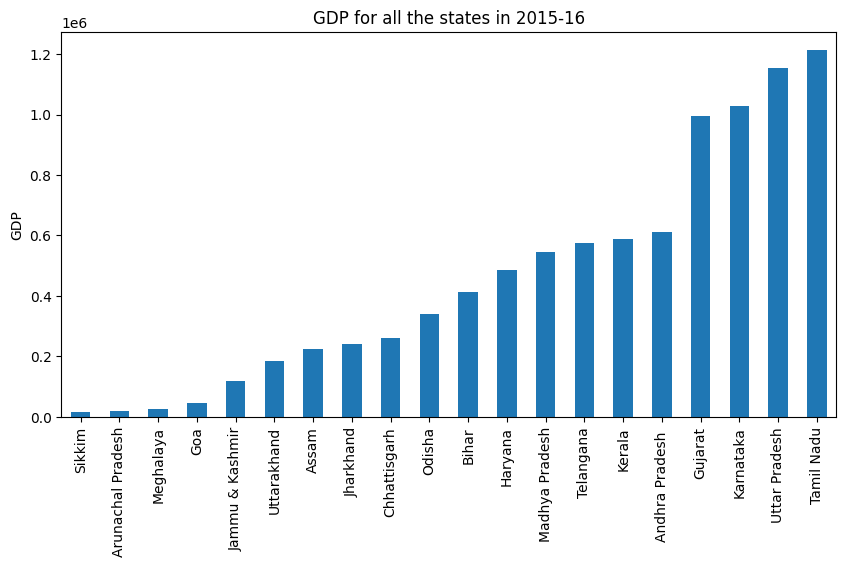

In [26]:
# Plotting GDP for all the states
plt.figure(figsize=(10,5))
df_GSDP_2015_16['2015-16'].plot(kind='bar',)
plt.ylabel('GDP')
plt.title('GDP for all the states in 2015-16')
plt.show()

a

In [28]:
# Listing all the CSV files name from GSVA folder. Each CSV file represents GSVA of of each state
file_list = [i for i in glob.glob('/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA//*.csv')]
file_list

['/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Manipur-GSVA_cur_2014-15.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Meghalaya-GSVA_cur_2016-17.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Jharkhand-GSVA_cur_2015-16.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Nagaland-GSVA_cur_2014-15.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Mizoram-GSVA_cur_2014-15.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Odisha-GSVA_cur_2016-17.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Kerala-GSVA_cur_2015-16.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Karnataka-GSVA_cur_2015-16.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Tripura-GSVA_cur_2014-15.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Maharashtra-GSVA_cur_2014-15.csv',
 '/content/drive

In [29]:
# Removing Union Territories from CSV lists
for i in file_list:
    if 'Puducherry' in i or 'Delhi' in i or 'Chandigarh' in i:
        file_list.remove(i)
file_list

['/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Manipur-GSVA_cur_2014-15.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Meghalaya-GSVA_cur_2016-17.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Jharkhand-GSVA_cur_2015-16.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Nagaland-GSVA_cur_2014-15.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Mizoram-GSVA_cur_2014-15.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Odisha-GSVA_cur_2016-17.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Kerala-GSVA_cur_2015-16.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Karnataka-GSVA_cur_2015-16.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Tripura-GSVA_cur_2014-15.csv',
 '/content/drive/MyDrive/IISF isro/Data/Dataset/GSVA/NAD-Maharashtra-GSVA_cur_2014-15.csv',
 '/content/drive

In [30]:
#### Reading GSVA file for each state and concatinating them

df_list = []

for file_name in file_list:
    #Reading each file
    df_GSVA = pd.read_csv(file_name,encoding='latin')
    # Retaining only 2014-15 column
    df_GSVA = df_GSVA.loc[:,['Item','2014-15']]
    # Retaining Sector, Sub-sector, GSDP and Per-capita GSDP rows.
    df_GSVA = df_GSVA[(df_GSVA['Item']=='Agriculture, forestry and fishing') | (df_GSVA['Item']=='Mining and quarrying') |
        (df_GSVA['Item']=='Primary') | (df_GSVA['Item']=='Manufacturing') |
       (df_GSVA['Item']=='Electricity, gas, water supply & other utility services') | (df_GSVA['Item']=='Construction') |
       (df_GSVA['Item']=='Secondary') | (df_GSVA['Item']=='Trade, repair, hotels and restaurants') |
       (df_GSVA['Item']=='Transport, storage, communication & services related to broadcasting') | (df_GSVA['Item']=='Financial services') |
       (df_GSVA['Item']=='Real estate, ownership of dwelling & professional services') | (df_GSVA['Item']=='Public administration') |
       (df_GSVA['Item']=='Other services') | (df_GSVA['Item']=='Tertiary') |
       (df_GSVA['Item']=='Gross State Domestic Product') | (df_GSVA['Item']=='Population (\'00)') | (df_GSVA['Item']=='Per Capita GSDP (Rs.)')]
    # Dropping S.No. column
    #df_GSVA = df_GSVA.drop('S.No.',axis=1)
    # Transposing the dataframe for better readablity
    df_GSVA = df_GSVA.T
    # Making the 'Item' as column name
    header = df_GSVA.iloc[0]
    df_GSVA = df_GSVA[1:]
    df_GSVA.columns = header
    # Adding 'State' name column
    df_GSVA['State'] = file_name.split('-')[1]
    # Appending Dataframe to the list
    df_list.append(df_GSVA)

df_GSVA_all_states = pd.concat(df_list,axis=0,ignore_index=True)
df_GSVA_all_states

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State
0,383140.0,NaN,383140.0,49501.0,27490.0,143182.0,220173.0,262950.0,109726.0,30315.0,159335.0,297078.0,317930.0,1177334.0,1804276.0,30873.0,58442.0,Manipur
1,366521.0,84529.0,451050.0,433213.0,54473.0,150256.0,637942.0,383974.0,148189.0,64091.0,150409.0,239782.0,214211.0,1200655.0,2440807.0,32020.0,76228.0,Meghalaya
2,3211065,2037289,5248354,4114148,337489,1789834,6241471,1991359,1470022,551441,1656784,1088325,1375410,8133341,21710718,349660,62091,Jharkhand
3,607897,8280,616178,18346,37944,156072,212361,140781,77521,60393,159651,295424,259186,992956,1841424,20550,89607,Nagaland
4,217010,8588,225598,8479,128365,133228,270072,114315,52587,23168,55068,206259,186222,637619,1155933,11833,97687,Mizoram
5,6422978,2586328,9009306,5754229,833067,2402396,8989693,3149555,2034016,1065147,2348714,1318221,2340603,12256258,32197092,435220,73979,Odisha
6,5930617,558824,6489442,4273567,482470,7314003,12070040,8557345,4020934,2010306,7287633,2068915,5728645,29673778,52600230,339843,154778,Kerala
7,16235647,1618373,17854020,4368833,1272905,4403151,10044889,5357515,2865802,1988794,2660123,2497321,2747805,18117360,48198169,765180,62989,Madhya_Pradesh
8,11219422,846882,12066304,12953843,1425762,6104799,20484404,8991658,5097652,4094169,24766393,2232584,5308174,50490630,92178806,635100,145141,Karnataka
9,799825.0,142391.0,942216.0,228625.0,77870.0,177899.0,484393.0,390423.0,155956.0,86094.0,190704.0,338244.0,323287.0,1484709.0,2966662.0,38350.0,77358.0,Tripura


In [31]:
# Renaming 'Population (\'00)' to 'Population'
df_GSVA_all_states.rename(columns={'Population (\'00)':'Population'},inplace=True)
df_GSVA_all_states

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),State
0,383140.0,NaN,383140.0,49501.0,27490.0,143182.0,220173.0,262950.0,109726.0,30315.0,159335.0,297078.0,317930.0,1177334.0,1804276.0,30873.0,58442.0,Manipur
1,366521.0,84529.0,451050.0,433213.0,54473.0,150256.0,637942.0,383974.0,148189.0,64091.0,150409.0,239782.0,214211.0,1200655.0,2440807.0,32020.0,76228.0,Meghalaya
2,3211065,2037289,5248354,4114148,337489,1789834,6241471,1991359,1470022,551441,1656784,1088325,1375410,8133341,21710718,349660,62091,Jharkhand
3,607897,8280,616178,18346,37944,156072,212361,140781,77521,60393,159651,295424,259186,992956,1841424,20550,89607,Nagaland
4,217010,8588,225598,8479,128365,133228,270072,114315,52587,23168,55068,206259,186222,637619,1155933,11833,97687,Mizoram
5,6422978,2586328,9009306,5754229,833067,2402396,8989693,3149555,2034016,1065147,2348714,1318221,2340603,12256258,32197092,435220,73979,Odisha
6,5930617,558824,6489442,4273567,482470,7314003,12070040,8557345,4020934,2010306,7287633,2068915,5728645,29673778,52600230,339843,154778,Kerala
7,16235647,1618373,17854020,4368833,1272905,4403151,10044889,5357515,2865802,1988794,2660123,2497321,2747805,18117360,48198169,765180,62989,Madhya_Pradesh
8,11219422,846882,12066304,12953843,1425762,6104799,20484404,8991658,5097652,4094169,24766393,2232584,5308174,50490630,92178806,635100,145141,Karnataka
9,799825.0,142391.0,942216.0,228625.0,77870.0,177899.0,484393.0,390423.0,155956.0,86094.0,190704.0,338244.0,323287.0,1484709.0,2966662.0,38350.0,77358.0,Tripura


In [32]:
# Moving 'State' column to first column
col_list = df_GSVA_all_states.columns.to_list()
col_list = ['State','Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Primary',
 'Manufacturing',
 'Electricity, gas, water supply & other utility services',
 'Construction',
 'Secondary',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting',
 'Financial services',
 'Real estate, ownership of dwelling & professional services',
 'Public administration',
 'Other services',
 'Tertiary',
 'Gross State Domestic Product',
 'Population',
 'Per Capita GSDP (Rs.)']
df_GSVA_all_states = df_GSVA_all_states.reindex(columns=col_list)
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
0,Manipur,383140.0,NaN,383140.0,49501.0,27490.0,143182.0,220173.0,262950.0,109726.0,30315.0,159335.0,297078.0,317930.0,1177334.0,1804276.0,30873.0,58442.0
1,Meghalaya,366521.0,84529.0,451050.0,433213.0,54473.0,150256.0,637942.0,383974.0,148189.0,64091.0,150409.0,239782.0,214211.0,1200655.0,2440807.0,32020.0,76228.0
2,Jharkhand,3211065,2037289,5248354,4114148,337489,1789834,6241471,1991359,1470022,551441,1656784,1088325,1375410,8133341,21710718,349660,62091
3,Nagaland,607897,8280,616178,18346,37944,156072,212361,140781,77521,60393,159651,295424,259186,992956,1841424,20550,89607
4,Mizoram,217010,8588,225598,8479,128365,133228,270072,114315,52587,23168,55068,206259,186222,637619,1155933,11833,97687
5,Odisha,6422978,2586328,9009306,5754229,833067,2402396,8989693,3149555,2034016,1065147,2348714,1318221,2340603,12256258,32197092,435220,73979
6,Kerala,5930617,558824,6489442,4273567,482470,7314003,12070040,8557345,4020934,2010306,7287633,2068915,5728645,29673778,52600230,339843,154778
7,Madhya_Pradesh,16235647,1618373,17854020,4368833,1272905,4403151,10044889,5357515,2865802,1988794,2660123,2497321,2747805,18117360,48198169,765180,62989
8,Karnataka,11219422,846882,12066304,12953843,1425762,6104799,20484404,8991658,5097652,4094169,24766393,2232584,5308174,50490630,92178806,635100,145141
9,Tripura,799825.0,142391.0,942216.0,228625.0,77870.0,177899.0,484393.0,390423.0,155956.0,86094.0,190704.0,338244.0,323287.0,1484709.0,2966662.0,38350.0,77358.0


In [33]:
# Converting all the columns from object to numeric (except State column) for further numeric calculation

col_list = col_list[1:]
df_GSVA_all_states[col_list] = df_GSVA_all_states[col_list].apply(pd.to_numeric)
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
0,Manipur,383140.0,NaN,383140.0,49501.0,27490.0,143182.0,220173.0,262950.0,109726.0,30315.0,159335.0,297078.0,317930.0,1177334.0,1804276.0,30873.0,58442.0
1,Meghalaya,366521.0,84529.0,451050.0,433213.0,54473.0,150256.0,637942.0,383974.0,148189.0,64091.0,150409.0,239782.0,214211.0,1200655.0,2440807.0,32020.0,76228.0
2,Jharkhand,3211065.0,2037289.0,5248354.0,4114148.0,337489.0,1789834.0,6241471.0,1991359.0,1470022.0,551441.0,1656784.0,1088325.0,1375410.0,8133341.0,21710718.0,349660.0,62091.0
3,Nagaland,607897.0,8280.0,616178.0,18346.0,37944.0,156072.0,212361.0,140781.0,77521.0,60393.0,159651.0,295424.0,259186.0,992956.0,1841424.0,20550.0,89607.0
4,Mizoram,217010.0,8588.0,225598.0,8479.0,128365.0,133228.0,270072.0,114315.0,52587.0,23168.0,55068.0,206259.0,186222.0,637619.0,1155933.0,11833.0,97687.0
5,Odisha,6422978.0,2586328.0,9009306.0,5754229.0,833067.0,2402396.0,8989693.0,3149555.0,2034016.0,1065147.0,2348714.0,1318221.0,2340603.0,12256258.0,32197092.0,435220.0,73979.0
6,Kerala,5930617.0,558824.0,6489442.0,4273567.0,482470.0,7314003.0,12070040.0,8557345.0,4020934.0,2010306.0,7287633.0,2068915.0,5728645.0,29673778.0,52600230.0,339843.0,154778.0
7,Madhya_Pradesh,16235647.0,1618373.0,17854020.0,4368833.0,1272905.0,4403151.0,10044889.0,5357515.0,2865802.0,1988794.0,2660123.0,2497321.0,2747805.0,18117360.0,48198169.0,765180.0,62989.0
8,Karnataka,11219422.0,846882.0,12066304.0,12953843.0,1425762.0,6104799.0,20484404.0,8991658.0,5097652.0,4094169.0,24766393.0,2232584.0,5308174.0,50490630.0,92178806.0,635100.0,145141.0
9,Tripura,799825.0,142391.0,942216.0,228625.0,77870.0,177899.0,484393.0,390423.0,155956.0,86094.0,190704.0,338244.0,323287.0,1484709.0,2966662.0,38350.0,77358.0


In [34]:
# Sorting 'df_GSVA_all_states' by 'Per Capita GSDP (Rs.)'
df_GSVA_all_states = df_GSVA_all_states.sort_values(by='Per Capita GSDP (Rs.)')
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
20,Bihar,7951890.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,5984896.0,7448373.0,3147173.0,1178022.0,3740641.0,2078171.0,4587589.0,22179969.0,37391988.0,1101240.0,33954.0
11,Uttar_Pradesh,25097754.0,901501.0,25999255.0,12261649.0,2030625.0,11256450.0,25548724.0,9437243.0,7404509.0,3392275.0,14548185.0,6152124.0,5034623.0,45968959.0,104337115.0,2109940.0,49450.0
0,Manipur,383140.0,NaN,383140.0,49501.0,27490.0,143182.0,220173.0,262950.0,109726.0,30315.0,159335.0,297078.0,317930.0,1177334.0,1804276.0,30873.0,58442.0
19,Assam,3855548.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,4033091.0,2987155.0,1194568.0,543651.0,1412466.0,1373611.0,1795658.0,9307109.0,19809800.0,326780.0,60621.0
2,Jharkhand,3211065.0,2037289.0,5248354.0,4114148.0,337489.0,1789834.0,6241471.0,1991359.0,1470022.0,551441.0,1656784.0,1088325.0,1375410.0,8133341.0,21710718.0,349660.0,62091.0
7,Madhya_Pradesh,16235647.0,1618373.0,17854020.0,4368833.0,1272905.0,4403151.0,10044889.0,5357515.0,2865802.0,1988794.0,2660123.0,2497321.0,2747805.0,18117360.0,48198169.0,765180.0,62989.0
5,Odisha,6422978.0,2586328.0,9009306.0,5754229.0,833067.0,2402396.0,8989693.0,3149555.0,2034016.0,1065147.0,2348714.0,1318221.0,2340603.0,12256258.0,32197092.0,435220.0,73979.0
1,Meghalaya,366521.0,84529.0,451050.0,433213.0,54473.0,150256.0,637942.0,383974.0,148189.0,64091.0,150409.0,239782.0,214211.0,1200655.0,2440807.0,32020.0,76228.0
9,Tripura,799825.0,142391.0,942216.0,228625.0,77870.0,177899.0,484393.0,390423.0,155956.0,86094.0,190704.0,338244.0,323287.0,1484709.0,2966662.0,38350.0,77358.0
17,Rajasthan,15044394.0,4069385.0,19113780.0,6552580.0,1122888.0,5353326.0,13028794.0,7297290.0,3814461.0,1827413.0,6451997.0,2460364.0,4164287.0,26015812.0,61219447.0,721610.0,84837.0


In [35]:
# GDP per capita for all the states
# Setting 'State' as index
df_per_capita = df_GSVA_all_states[['State','Per Capita GSDP (Rs.)']]
df_per_capita = df_per_capita.set_index('State')
df_per_capita

Item,Per Capita GSDP (Rs.)
State,
Bihar,33954.0
Uttar_Pradesh,49450.0
Manipur,58442.0
Assam,60621.0
Jharkhand,62091.0
Madhya_Pradesh,62989.0
Odisha,73979.0
Meghalaya,76228.0
Tripura,77358.0


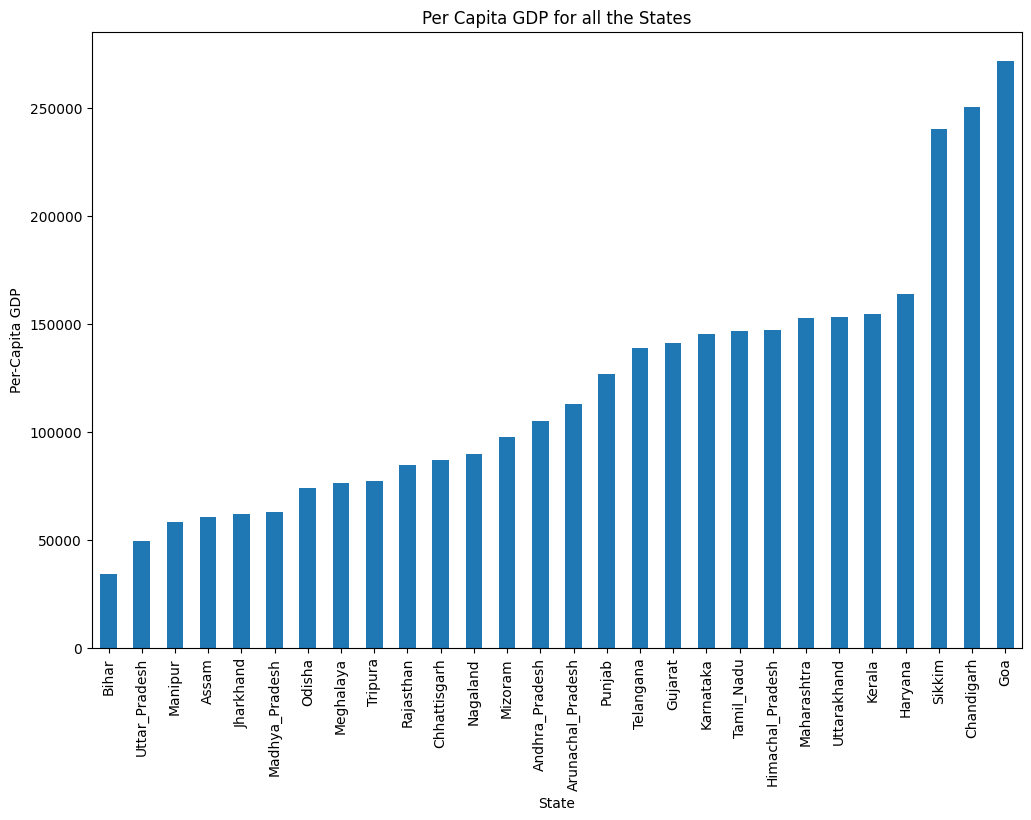

In [36]:
# Plotting per capita for all the states
df_per_capita['Per Capita GSDP (Rs.)'].plot(kind='bar',figsize=(12,8))
plt.ylabel('Per-Capita GDP')
plt.title('Per Capita GDP for all the States')
plt.show()

In [37]:
# % contribution of Primary sector to total GDP of the states
df_GSVA_all_states['% Primary contribution'] = round(((df_GSVA_all_states['Primary']/df_GSVA_all_states['Gross State Domestic Product'])*100),2)
df_GSVA_all_states['% Secondary contribution'] = round(((df_GSVA_all_states['Secondary']/df_GSVA_all_states['Gross State Domestic Product'])*100),2)
df_GSVA_all_states['% Tertiary contribution'] = round(((df_GSVA_all_states['Tertiary']/df_GSVA_all_states['Gross State Domestic Product'])*100),2)
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution
20,Bihar,7951890.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,5984896.0,7448373.0,3147173.0,...,3740641.0,2078171.0,4587589.0,22179969.0,37391988.0,1101240.0,33954.0,21.45,16.01,59.32
11,Uttar_Pradesh,25097754.0,901501.0,25999255.0,12261649.0,2030625.0,11256450.0,25548724.0,9437243.0,7404509.0,...,14548185.0,6152124.0,5034623.0,45968959.0,104337115.0,2109940.0,49450.0,24.92,24.49,44.06
0,Manipur,383140.0,NaN,383140.0,49501.0,27490.0,143182.0,220173.0,262950.0,109726.0,...,159335.0,297078.0,317930.0,1177334.0,1804276.0,30873.0,58442.0,21.24,12.20,65.25
19,Assam,3855548.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,4033091.0,2987155.0,1194568.0,...,1412466.0,1373611.0,1795658.0,9307109.0,19809800.0,326780.0,60621.0,26.89,20.36,46.98
2,Jharkhand,3211065.0,2037289.0,5248354.0,4114148.0,337489.0,1789834.0,6241471.0,1991359.0,1470022.0,...,1656784.0,1088325.0,1375410.0,8133341.0,21710718.0,349660.0,62091.0,24.17,28.75,37.46
7,Madhya_Pradesh,16235647.0,1618373.0,17854020.0,4368833.0,1272905.0,4403151.0,10044889.0,5357515.0,2865802.0,...,2660123.0,2497321.0,2747805.0,18117360.0,48198169.0,765180.0,62989.0,37.04,20.84,37.59
5,Odisha,6422978.0,2586328.0,9009306.0,5754229.0,833067.0,2402396.0,8989693.0,3149555.0,2034016.0,...,2348714.0,1318221.0,2340603.0,12256258.0,32197092.0,435220.0,73979.0,27.98,27.92,38.07
1,Meghalaya,366521.0,84529.0,451050.0,433213.0,54473.0,150256.0,637942.0,383974.0,148189.0,...,150409.0,239782.0,214211.0,1200655.0,2440807.0,32020.0,76228.0,18.48,26.14,49.19
9,Tripura,799825.0,142391.0,942216.0,228625.0,77870.0,177899.0,484393.0,390423.0,155956.0,...,190704.0,338244.0,323287.0,1484709.0,2966662.0,38350.0,77358.0,31.76,16.33,50.05
17,Rajasthan,15044394.0,4069385.0,19113780.0,6552580.0,1122888.0,5353326.0,13028794.0,7297290.0,3814461.0,...,6451997.0,2460364.0,4164287.0,26015812.0,61219447.0,721610.0,84837.0,31.22,21.28,42.50


In [38]:
df_sector_contribution = df_GSVA_all_states[['State','% Primary contribution','% Secondary contribution','% Tertiary contribution']]
df_sector_contribution = df_sector_contribution.set_index('State')
df_sector_contribution

Item,% Primary contribution,% Secondary contribution,% Tertiary contribution
State,,,
Bihar,21.45,16.01,59.32
Uttar_Pradesh,24.92,24.49,44.06
Manipur,21.24,12.20,65.25
Assam,26.89,20.36,46.98
Jharkhand,24.17,28.75,37.46
Madhya_Pradesh,37.04,20.84,37.59
Odisha,27.98,27.92,38.07
Meghalaya,18.48,26.14,49.19
Tripura,31.76,16.33,50.05


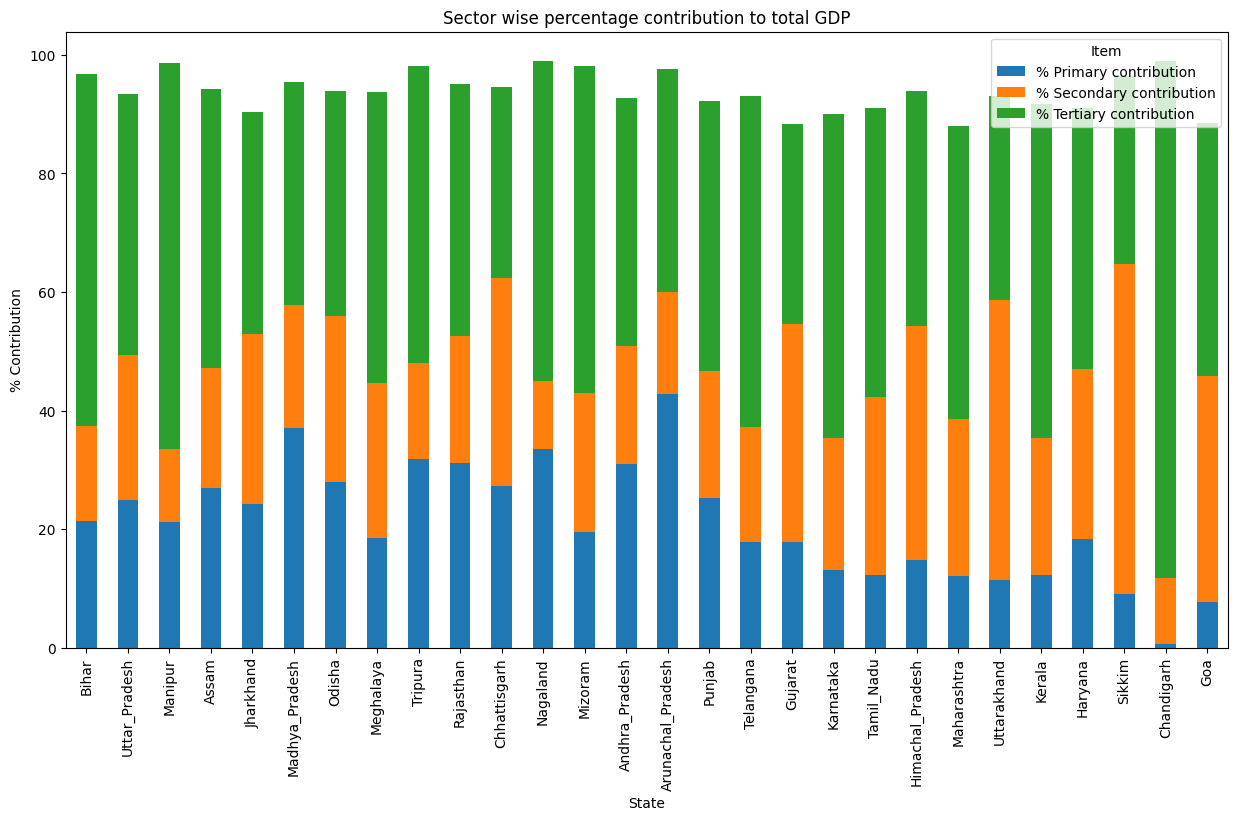

In [39]:
# Plotting sector wise percentage contribution to GSDP for all the states
df_sector_contribution.plot(kind='bar',stacked=True,figsize=(15, 8))
plt.ylabel('% Contribution')
plt.title('Sector wise percentage contribution to total GDP')
plt.show()

**Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.**

In [40]:
# Taking the quantile values for each category
val_C1 = df_GSVA_all_states['Per Capita GSDP (Rs.)'].quantile([1]).values
val_C2 = df_GSVA_all_states['Per Capita GSDP (Rs.)'].quantile([.85]).values
val_C3 = df_GSVA_all_states['Per Capita GSDP (Rs.)'].quantile([.50]).values
val_C4 = df_GSVA_all_states['Per Capita GSDP (Rs.)'].quantile([.20]).values
print(val_C1)
print(val_C2)
print(val_C3)
print(val_C4)

[271793.]
[154692.9]
[108847.5]
[67385.]


In [41]:
# Defining a function for categorizing the states
def state_category(x):
    if ((x>=0) and (x<val_C4)):
        return 'C4'
    elif ((x>=val_C4) and (x<val_C3)):
        return 'C3'
    elif ((x>=val_C3) and (x<val_C2)):
        return 'C2'
    else:
        return 'C1'

In [42]:
# Creating 'Category' column
# Applying the above 'state_category' function to 'Per Capita GSDP (Rs.)' column
df_GSVA_all_states['Category'] = df_GSVA_all_states['Per Capita GSDP (Rs.)'].apply(state_category)
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Category
20,Bihar,7951890.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,5984896.0,7448373.0,3147173.0,...,2078171.0,4587589.0,22179969.0,37391988.0,1101240.0,33954.0,21.45,16.01,59.32,C4
11,Uttar_Pradesh,25097754.0,901501.0,25999255.0,12261649.0,2030625.0,11256450.0,25548724.0,9437243.0,7404509.0,...,6152124.0,5034623.0,45968959.0,104337115.0,2109940.0,49450.0,24.92,24.49,44.06,C4
0,Manipur,383140.0,NaN,383140.0,49501.0,27490.0,143182.0,220173.0,262950.0,109726.0,...,297078.0,317930.0,1177334.0,1804276.0,30873.0,58442.0,21.24,12.20,65.25,C4
19,Assam,3855548.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,4033091.0,2987155.0,1194568.0,...,1373611.0,1795658.0,9307109.0,19809800.0,326780.0,60621.0,26.89,20.36,46.98,C4
2,Jharkhand,3211065.0,2037289.0,5248354.0,4114148.0,337489.0,1789834.0,6241471.0,1991359.0,1470022.0,...,1088325.0,1375410.0,8133341.0,21710718.0,349660.0,62091.0,24.17,28.75,37.46,C4
7,Madhya_Pradesh,16235647.0,1618373.0,17854020.0,4368833.0,1272905.0,4403151.0,10044889.0,5357515.0,2865802.0,...,2497321.0,2747805.0,18117360.0,48198169.0,765180.0,62989.0,37.04,20.84,37.59,C4
5,Odisha,6422978.0,2586328.0,9009306.0,5754229.0,833067.0,2402396.0,8989693.0,3149555.0,2034016.0,...,1318221.0,2340603.0,12256258.0,32197092.0,435220.0,73979.0,27.98,27.92,38.07,C3
1,Meghalaya,366521.0,84529.0,451050.0,433213.0,54473.0,150256.0,637942.0,383974.0,148189.0,...,239782.0,214211.0,1200655.0,2440807.0,32020.0,76228.0,18.48,26.14,49.19,C3
9,Tripura,799825.0,142391.0,942216.0,228625.0,77870.0,177899.0,484393.0,390423.0,155956.0,...,338244.0,323287.0,1484709.0,2966662.0,38350.0,77358.0,31.76,16.33,50.05,C3
17,Rajasthan,15044394.0,4069385.0,19113780.0,6552580.0,1122888.0,5353326.0,13028794.0,7297290.0,3814461.0,...,2460364.0,4164287.0,26015812.0,61219447.0,721610.0,84837.0,31.22,21.28,42.50,C3


# **C1 State**

In [43]:
# Creating dataframe for C1 states
# Taking only sub sectors columns and total GSDP
df_state_C1 = df_GSVA_all_states[df_GSVA_all_states['Category']=='C1']
df_state_C1 = df_state_C1[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C1

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
6,Kerala,5930617.0,558824.0,4273567.0,482470.0,7314003.0,8557345.0,4020934.0,2010306.0,7287633.0,2068915.0,5728645.0,52600230.0
23,Haryana,8015238.0,25186.0,7756921.0,1101919.0,3702571.0,4986319.0,2560623.0,1671486.0,6970183.0,1036377.0,2001581.0,43746207.0
25,Sikkim,137447.0,1329.0,550697.0,212499.0,82058.0,70568.0,47347.0,21079.0,75330.0,119514.0,149265.0,1520933.0
27,Chandigarh,16233.0,179.0,149631.0,29741.0,133321.0,965781.0,148302.0,373045.0,598448.0,183889.0,156543.0,2784426.0
26,Goa,308507.0,3622.0,1177608.0,204110.0,165819.0,380927.0,189656.0,233618.0,407099.0,346486.0,180431.0,4063307.0


In [44]:
# Transposing 'df_state_C1'
df_state_C1 = df_state_C1.T
df_state_C1

,6,23,25,27,26
Item,,,,,
State,Kerala,Haryana,Sikkim,Chandigarh,Goa
"Agriculture, forestry and fishing",5930617.0,8015238.0,137447.0,16233.0,308507.0
Mining and quarrying,558824.0,25186.0,1329.0,179.0,3622.0
Manufacturing,4273567.0,7756921.0,550697.0,149631.0,1177608.0
"Electricity, gas, water supply & other utility services",482470.0,1101919.0,212499.0,29741.0,204110.0
Construction,7314003.0,3702571.0,82058.0,133321.0,165819.0
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568.0,965781.0,380927.0
"Transport, storage, communication & services related to broadcasting",4020934.0,2560623.0,47347.0,148302.0,189656.0
Financial services,2010306.0,1671486.0,21079.0,373045.0,233618.0


In [45]:
# Creating column header with States name
header = df_state_C1.iloc[0]
df_state_C1 = df_state_C1[1:]
df_state_C1.columns = header
df_state_C1

State,Kerala,Haryana,Sikkim,Chandigarh,Goa
Item,,,,,
"Agriculture, forestry and fishing",5930617.0,8015238.0,137447.0,16233.0,308507.0
Mining and quarrying,558824.0,25186.0,1329.0,179.0,3622.0
Manufacturing,4273567.0,7756921.0,550697.0,149631.0,1177608.0
"Electricity, gas, water supply & other utility services",482470.0,1101919.0,212499.0,29741.0,204110.0
Construction,7314003.0,3702571.0,82058.0,133321.0,165819.0
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568.0,965781.0,380927.0
"Transport, storage, communication & services related to broadcasting",4020934.0,2560623.0,47347.0,148302.0,189656.0
Financial services,2010306.0,1671486.0,21079.0,373045.0,233618.0
"Real estate, ownership of dwelling & professional services",7287633.0,6970183.0,75330.0,598448.0,407099.0


In [46]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C1['Total'] = df_state_C1['Kerala']+df_state_C1['Haryana']+df_state_C1['Sikkim']+df_state_C1['Goa']
df_state_C1

State,Kerala,Haryana,Sikkim,Chandigarh,Goa,Total
Item,,,,,,
"Agriculture, forestry and fishing",5930617.0,8015238.0,137447.0,16233.0,308507.0,14391809.0
Mining and quarrying,558824.0,25186.0,1329.0,179.0,3622.0,588961.0
Manufacturing,4273567.0,7756921.0,550697.0,149631.0,1177608.0,13758793.0
"Electricity, gas, water supply & other utility services",482470.0,1101919.0,212499.0,29741.0,204110.0,2000998.0
Construction,7314003.0,3702571.0,82058.0,133321.0,165819.0,11264451.0
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568.0,965781.0,380927.0,13995159.0
"Transport, storage, communication & services related to broadcasting",4020934.0,2560623.0,47347.0,148302.0,189656.0,6818560.0
Financial services,2010306.0,1671486.0,21079.0,373045.0,233618.0,3936489.0
"Real estate, ownership of dwelling & professional services",7287633.0,6970183.0,75330.0,598448.0,407099.0,14740245.0


In [47]:
# Converting all the columns data type to numeric
df_state_C1[df_state_C1.columns] = df_state_C1[df_state_C1.columns].apply(pd.to_numeric)

# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP
df_state_C1['% Sub Sector Contribution'] = round(((df_state_C1['Total']/df_state_C1.at['Gross State Domestic Product','Total'])*100),2)
df_state_C1

State,Kerala,Haryana,Sikkim,Chandigarh,Goa,Total,% Sub Sector Contribution
Item,,,,,,,
"Agriculture, forestry and fishing",5930617.0,8015238.0,137447.0,16233.0,308507.0,14391809.0,14.12
Mining and quarrying,558824.0,25186.0,1329.0,179.0,3622.0,588961.0,0.58
Manufacturing,4273567.0,7756921.0,550697.0,149631.0,1177608.0,13758793.0,13.50
"Electricity, gas, water supply & other utility services",482470.0,1101919.0,212499.0,29741.0,204110.0,2000998.0,1.96
Construction,7314003.0,3702571.0,82058.0,133321.0,165819.0,11264451.0,11.05
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568.0,965781.0,380927.0,13995159.0,13.73
"Transport, storage, communication & services related to broadcasting",4020934.0,2560623.0,47347.0,148302.0,189656.0,6818560.0,6.69
Financial services,2010306.0,1671486.0,21079.0,373045.0,233618.0,3936489.0,3.86
"Real estate, ownership of dwelling & professional services",7287633.0,6970183.0,75330.0,598448.0,407099.0,14740245.0,14.46


In [51]:
# plt.figure(figsize=(8,6))
# sns.heatmap(data=df_state_C1.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
# plt.show()

In [52]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C1 = df_state_C1.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C1 = df_state_C1.drop('Gross State Domestic Product')
df_state_C1

State,Kerala,Haryana,Sikkim,Chandigarh,Goa,Total,% Sub Sector Contribution
Item,,,,,,,
"Real estate, ownership of dwelling & professional services",7287633.0,6970183.0,75330.0,598448.0,407099.0,14740245.0,14.46
"Agriculture, forestry and fishing",5930617.0,8015238.0,137447.0,16233.0,308507.0,14391809.0,14.12
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568.0,965781.0,380927.0,13995159.0,13.73
Manufacturing,4273567.0,7756921.0,550697.0,149631.0,1177608.0,13758793.0,13.50
Construction,7314003.0,3702571.0,82058.0,133321.0,165819.0,11264451.0,11.05
Other services,5728645.0,2001581.0,149265.0,156543.0,180431.0,8059922.0,7.91
"Transport, storage, communication & services related to broadcasting",4020934.0,2560623.0,47347.0,148302.0,189656.0,6818560.0,6.69
Financial services,2010306.0,1671486.0,21079.0,373045.0,233618.0,3936489.0,3.86
Public administration,2068915.0,1036377.0,119514.0,183889.0,346486.0,3571292.0,3.50


In [53]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C1['Top 80%'] = df_state_C1['% Sub Sector Contribution'].cumsum()
df_state_C1

State,Kerala,Haryana,Sikkim,Chandigarh,Goa,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,
"Real estate, ownership of dwelling & professional services",7287633.0,6970183.0,75330.0,598448.0,407099.0,14740245.0,14.46,14.46
"Agriculture, forestry and fishing",5930617.0,8015238.0,137447.0,16233.0,308507.0,14391809.0,14.12,28.58
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568.0,965781.0,380927.0,13995159.0,13.73,42.31
Manufacturing,4273567.0,7756921.0,550697.0,149631.0,1177608.0,13758793.0,13.50,55.81
Construction,7314003.0,3702571.0,82058.0,133321.0,165819.0,11264451.0,11.05,66.86
Other services,5728645.0,2001581.0,149265.0,156543.0,180431.0,8059922.0,7.91,74.77
"Transport, storage, communication & services related to broadcasting",4020934.0,2560623.0,47347.0,148302.0,189656.0,6818560.0,6.69,81.46
Financial services,2010306.0,1671486.0,21079.0,373045.0,233618.0,3936489.0,3.86,85.32
Public administration,2068915.0,1036377.0,119514.0,183889.0,346486.0,3571292.0,3.50,88.82


In [54]:
# Filtering the sub sectors, which contribute more than 80%
# Please note 'Transport, storage, communication & services related to broadcasting' sub sector is also included
# because it is just above 80%
df_state_C1 = df_state_C1[df_state_C1['Top 80%'] < 82]
df_state_C1

State,Kerala,Haryana,Sikkim,Chandigarh,Goa,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,
"Real estate, ownership of dwelling & professional services",7287633.0,6970183.0,75330.0,598448.0,407099.0,14740245.0,14.46,14.46
"Agriculture, forestry and fishing",5930617.0,8015238.0,137447.0,16233.0,308507.0,14391809.0,14.12,28.58
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568.0,965781.0,380927.0,13995159.0,13.73,42.31
Manufacturing,4273567.0,7756921.0,550697.0,149631.0,1177608.0,13758793.0,13.50,55.81
Construction,7314003.0,3702571.0,82058.0,133321.0,165819.0,11264451.0,11.05,66.86
Other services,5728645.0,2001581.0,149265.0,156543.0,180431.0,8059922.0,7.91,74.77
"Transport, storage, communication & services related to broadcasting",4020934.0,2560623.0,47347.0,148302.0,189656.0,6818560.0,6.69,81.46


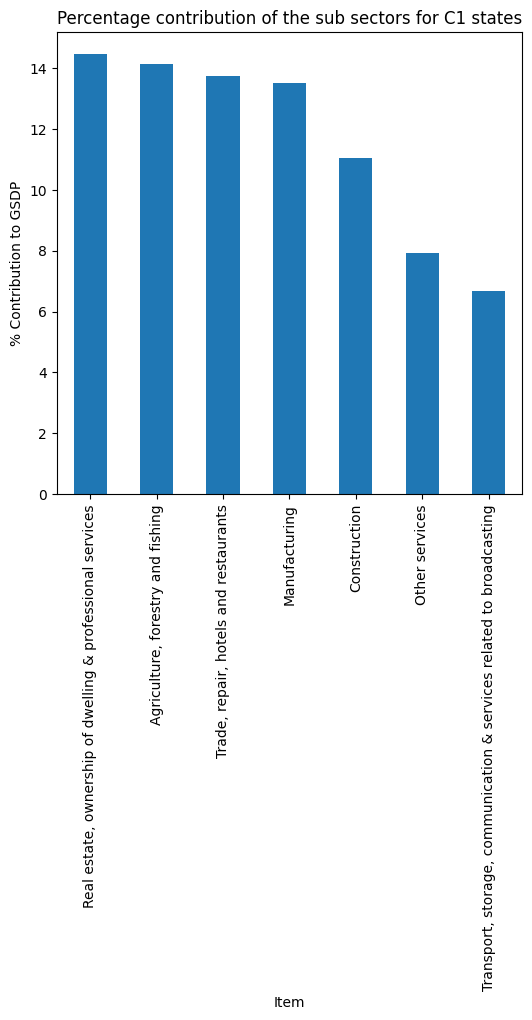

In [65]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C1 category states
df_state_C1['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C1 states')
plt.show()

# **C2 States**

In [66]:
# Creating dataframe for C2 states
# Taking only sub sectors columns and total GSDP
df_state_C2 = df_GSVA_all_states[df_GSVA_all_states['Category']=='C2']
df_state_C2 = df_state_C2[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C2

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
15,Arunachal_Pradesh,686117.0,30842.0,26120.0,113527.0,147842.0,60421.0,35203.0,25207.0,48418.0,243867.0,218728.0,1676119.0
12,Punjab,9285716.0,10354.0,4790341.0,911611.0,2202962.0,4419919.0,1951809.0,2057520.0,3142786.0,1842730.0,3303041.0,36801089.0
16,Telangana,7591501.0,1541853.0,6353711.0,716266.0,2854024.0,6494607.0,3604741.0,3023729.0,9478839.0,1711265.0,4158229.0,51117765.0
22,Gujarat,13769969.0,2117218.0,24087538.0,3409983.0,5526017.0,10178713.0,4555910.0,4606644.0,5179502.0,2576195.0,3123413.0,89502727.0
8,Karnataka,11219422.0,846882.0,12953843.0,1425762.0,6104799.0,8991658.0,5097652.0,4094169.0,24766393.0,2232584.0,5308174.0,92178806.0
14,Tamil_Nadu,13064238.0,265536.0,18914794.0,1710379.0,12216718.0,12895842.0,7188320.0,5598498.0,16830213.0,3400800.0,7430115.0,109256373.0
21,Himachal_Pradesh,1514981.0,33385.0,2543637.0,767268.0,808256.0,615496.0,552234.0,362521.0,1125937.0,553974.0,923164.0,10436879.0
10,Maharashtra,16475655.0,5282727.0,33660294.0,4334702.0,9450211.0,15839100.0,9697246.0,16143324.0,30718051.0,5426991.0,10806363.0,179212165.0
13,Uttarakhand,1601423.0,244549.0,5866252.0,433880.0,1342733.0,1743106.0,1066693.0,385030.0,831307.0,579409.0,982430.0,16198529.0


In [67]:
# Transposing 'df_state_C2'
df_state_C2 = df_state_C2.T
df_state_C2

,15,12,16,22,8,14,21,10,13
Item,,,,,,,,,
State,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand
"Agriculture, forestry and fishing",686117.0,9285716.0,7591501.0,13769969.0,11219422.0,13064238.0,1514981.0,16475655.0,1601423.0
Mining and quarrying,30842.0,10354.0,1541853.0,2117218.0,846882.0,265536.0,33385.0,5282727.0,244549.0
Manufacturing,26120.0,4790341.0,6353711.0,24087538.0,12953843.0,18914794.0,2543637.0,33660294.0,5866252.0
"Electricity, gas, water supply & other utility services",113527.0,911611.0,716266.0,3409983.0,1425762.0,1710379.0,767268.0,4334702.0,433880.0
Construction,147842.0,2202962.0,2854024.0,5526017.0,6104799.0,12216718.0,808256.0,9450211.0,1342733.0
"Trade, repair, hotels and restaurants",60421.0,4419919.0,6494607.0,10178713.0,8991658.0,12895842.0,615496.0,15839100.0,1743106.0
"Transport, storage, communication & services related to broadcasting",35203.0,1951809.0,3604741.0,4555910.0,5097652.0,7188320.0,552234.0,9697246.0,1066693.0
Financial services,25207.0,2057520.0,3023729.0,4606644.0,4094169.0,5598498.0,362521.0,16143324.0,385030.0


In [68]:
# Creating column header with States name
header = df_state_C2.iloc[0]
df_state_C2 = df_state_C2[1:]
df_state_C2.columns = header
df_state_C2

State,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand
Item,,,,,,,,,
"Agriculture, forestry and fishing",686117.0,9285716.0,7591501.0,13769969.0,11219422.0,13064238.0,1514981.0,16475655.0,1601423.0
Mining and quarrying,30842.0,10354.0,1541853.0,2117218.0,846882.0,265536.0,33385.0,5282727.0,244549.0
Manufacturing,26120.0,4790341.0,6353711.0,24087538.0,12953843.0,18914794.0,2543637.0,33660294.0,5866252.0
"Electricity, gas, water supply & other utility services",113527.0,911611.0,716266.0,3409983.0,1425762.0,1710379.0,767268.0,4334702.0,433880.0
Construction,147842.0,2202962.0,2854024.0,5526017.0,6104799.0,12216718.0,808256.0,9450211.0,1342733.0
"Trade, repair, hotels and restaurants",60421.0,4419919.0,6494607.0,10178713.0,8991658.0,12895842.0,615496.0,15839100.0,1743106.0
"Transport, storage, communication & services related to broadcasting",35203.0,1951809.0,3604741.0,4555910.0,5097652.0,7188320.0,552234.0,9697246.0,1066693.0
Financial services,25207.0,2057520.0,3023729.0,4606644.0,4094169.0,5598498.0,362521.0,16143324.0,385030.0
"Real estate, ownership of dwelling & professional services",48418.0,3142786.0,9478839.0,5179502.0,24766393.0,16830213.0,1125937.0,30718051.0,831307.0


In [71]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C2['Total'] = df_state_C2['Arunachal_Pradesh']+df_state_C2['Punjab']+df_state_C2['Telangana']+df_state_C2['Gujarat']+df_state_C2['Karnataka']+df_state_C2['Tamil_Nadu']+df_state_C2['Himachal_Pradesh']+df_state_C2['Maharashtra']+df_state_C2['Uttarakhand']
df_state_C2

State,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total
Item,,,,,,,,,,
"Agriculture, forestry and fishing",686117.0,9285716.0,7591501.0,13769969.0,11219422.0,13064238.0,1514981.0,16475655.0,1601423.0,75209022.0
Mining and quarrying,30842.0,10354.0,1541853.0,2117218.0,846882.0,265536.0,33385.0,5282727.0,244549.0,10373346.0
Manufacturing,26120.0,4790341.0,6353711.0,24087538.0,12953843.0,18914794.0,2543637.0,33660294.0,5866252.0,109196530.0
"Electricity, gas, water supply & other utility services",113527.0,911611.0,716266.0,3409983.0,1425762.0,1710379.0,767268.0,4334702.0,433880.0,13823378.0
Construction,147842.0,2202962.0,2854024.0,5526017.0,6104799.0,12216718.0,808256.0,9450211.0,1342733.0,40653562.0
"Trade, repair, hotels and restaurants",60421.0,4419919.0,6494607.0,10178713.0,8991658.0,12895842.0,615496.0,15839100.0,1743106.0,61238862.0
"Transport, storage, communication & services related to broadcasting",35203.0,1951809.0,3604741.0,4555910.0,5097652.0,7188320.0,552234.0,9697246.0,1066693.0,33749808.0
Financial services,25207.0,2057520.0,3023729.0,4606644.0,4094169.0,5598498.0,362521.0,16143324.0,385030.0,36296642.0
"Real estate, ownership of dwelling & professional services",48418.0,3142786.0,9478839.0,5179502.0,24766393.0,16830213.0,1125937.0,30718051.0,831307.0,92121446.0


In [72]:
# Converting all the columns data type to numeric
df_state_C2[df_state_C2.columns] = df_state_C2[df_state_C2.columns].apply(pd.to_numeric)
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP
df_state_C2['% Sub Sector Contribution'] = round(((df_state_C2['Total']/df_state_C2.at['Gross State Domestic Product','Total'])*100),2)
df_state_C2

State,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total,% Sub Sector Contribution
Item,,,,,,,,,,,
"Agriculture, forestry and fishing",686117.0,9285716.0,7591501.0,13769969.0,11219422.0,13064238.0,1514981.0,16475655.0,1601423.0,75209022.0,12.83
Mining and quarrying,30842.0,10354.0,1541853.0,2117218.0,846882.0,265536.0,33385.0,5282727.0,244549.0,10373346.0,1.77
Manufacturing,26120.0,4790341.0,6353711.0,24087538.0,12953843.0,18914794.0,2543637.0,33660294.0,5866252.0,109196530.0,18.62
"Electricity, gas, water supply & other utility services",113527.0,911611.0,716266.0,3409983.0,1425762.0,1710379.0,767268.0,4334702.0,433880.0,13823378.0,2.36
Construction,147842.0,2202962.0,2854024.0,5526017.0,6104799.0,12216718.0,808256.0,9450211.0,1342733.0,40653562.0,6.93
"Trade, repair, hotels and restaurants",60421.0,4419919.0,6494607.0,10178713.0,8991658.0,12895842.0,615496.0,15839100.0,1743106.0,61238862.0,10.44
"Transport, storage, communication & services related to broadcasting",35203.0,1951809.0,3604741.0,4555910.0,5097652.0,7188320.0,552234.0,9697246.0,1066693.0,33749808.0,5.76
Financial services,25207.0,2057520.0,3023729.0,4606644.0,4094169.0,5598498.0,362521.0,16143324.0,385030.0,36296642.0,6.19
"Real estate, ownership of dwelling & professional services",48418.0,3142786.0,9478839.0,5179502.0,24766393.0,16830213.0,1125937.0,30718051.0,831307.0,92121446.0,15.71


In [73]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C2 = df_state_C2.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C2 = df_state_C2.drop('Gross State Domestic Product')
df_state_C2

State,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total,% Sub Sector Contribution
Item,,,,,,,,,,,
Manufacturing,26120.0,4790341.0,6353711.0,24087538.0,12953843.0,18914794.0,2543637.0,33660294.0,5866252.0,109196530.0,18.62
"Real estate, ownership of dwelling & professional services",48418.0,3142786.0,9478839.0,5179502.0,24766393.0,16830213.0,1125937.0,30718051.0,831307.0,92121446.0,15.71
"Agriculture, forestry and fishing",686117.0,9285716.0,7591501.0,13769969.0,11219422.0,13064238.0,1514981.0,16475655.0,1601423.0,75209022.0,12.83
"Trade, repair, hotels and restaurants",60421.0,4419919.0,6494607.0,10178713.0,8991658.0,12895842.0,615496.0,15839100.0,1743106.0,61238862.0,10.44
Construction,147842.0,2202962.0,2854024.0,5526017.0,6104799.0,12216718.0,808256.0,9450211.0,1342733.0,40653562.0,6.93
Financial services,25207.0,2057520.0,3023729.0,4606644.0,4094169.0,5598498.0,362521.0,16143324.0,385030.0,36296642.0,6.19
Other services,218728.0,3303041.0,4158229.0,3123413.0,5308174.0,7430115.0,923164.0,10806363.0,982430.0,36253657.0,6.18
"Transport, storage, communication & services related to broadcasting",35203.0,1951809.0,3604741.0,4555910.0,5097652.0,7188320.0,552234.0,9697246.0,1066693.0,33749808.0,5.76
Public administration,243867.0,1842730.0,1711265.0,2576195.0,2232584.0,3400800.0,553974.0,5426991.0,579409.0,18567815.0,3.17


In [74]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C2['Top 80%'] = df_state_C2['% Sub Sector Contribution'].cumsum()
df_state_C2

State,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,,,,
Manufacturing,26120.0,4790341.0,6353711.0,24087538.0,12953843.0,18914794.0,2543637.0,33660294.0,5866252.0,109196530.0,18.62,18.62
"Real estate, ownership of dwelling & professional services",48418.0,3142786.0,9478839.0,5179502.0,24766393.0,16830213.0,1125937.0,30718051.0,831307.0,92121446.0,15.71,34.33
"Agriculture, forestry and fishing",686117.0,9285716.0,7591501.0,13769969.0,11219422.0,13064238.0,1514981.0,16475655.0,1601423.0,75209022.0,12.83,47.16
"Trade, repair, hotels and restaurants",60421.0,4419919.0,6494607.0,10178713.0,8991658.0,12895842.0,615496.0,15839100.0,1743106.0,61238862.0,10.44,57.60
Construction,147842.0,2202962.0,2854024.0,5526017.0,6104799.0,12216718.0,808256.0,9450211.0,1342733.0,40653562.0,6.93,64.53
Financial services,25207.0,2057520.0,3023729.0,4606644.0,4094169.0,5598498.0,362521.0,16143324.0,385030.0,36296642.0,6.19,70.72
Other services,218728.0,3303041.0,4158229.0,3123413.0,5308174.0,7430115.0,923164.0,10806363.0,982430.0,36253657.0,6.18,76.90
"Transport, storage, communication & services related to broadcasting",35203.0,1951809.0,3604741.0,4555910.0,5097652.0,7188320.0,552234.0,9697246.0,1066693.0,33749808.0,5.76,82.66
Public administration,243867.0,1842730.0,1711265.0,2576195.0,2232584.0,3400800.0,553974.0,5426991.0,579409.0,18567815.0,3.17,85.83


In [75]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C2 = df_state_C2[df_state_C2['Top 80%'] < 80]
df_state_C2

State,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,,,,
Manufacturing,26120.0,4790341.0,6353711.0,24087538.0,12953843.0,18914794.0,2543637.0,33660294.0,5866252.0,109196530.0,18.62,18.62
"Real estate, ownership of dwelling & professional services",48418.0,3142786.0,9478839.0,5179502.0,24766393.0,16830213.0,1125937.0,30718051.0,831307.0,92121446.0,15.71,34.33
"Agriculture, forestry and fishing",686117.0,9285716.0,7591501.0,13769969.0,11219422.0,13064238.0,1514981.0,16475655.0,1601423.0,75209022.0,12.83,47.16
"Trade, repair, hotels and restaurants",60421.0,4419919.0,6494607.0,10178713.0,8991658.0,12895842.0,615496.0,15839100.0,1743106.0,61238862.0,10.44,57.60
Construction,147842.0,2202962.0,2854024.0,5526017.0,6104799.0,12216718.0,808256.0,9450211.0,1342733.0,40653562.0,6.93,64.53
Financial services,25207.0,2057520.0,3023729.0,4606644.0,4094169.0,5598498.0,362521.0,16143324.0,385030.0,36296642.0,6.19,70.72
Other services,218728.0,3303041.0,4158229.0,3123413.0,5308174.0,7430115.0,923164.0,10806363.0,982430.0,36253657.0,6.18,76.90


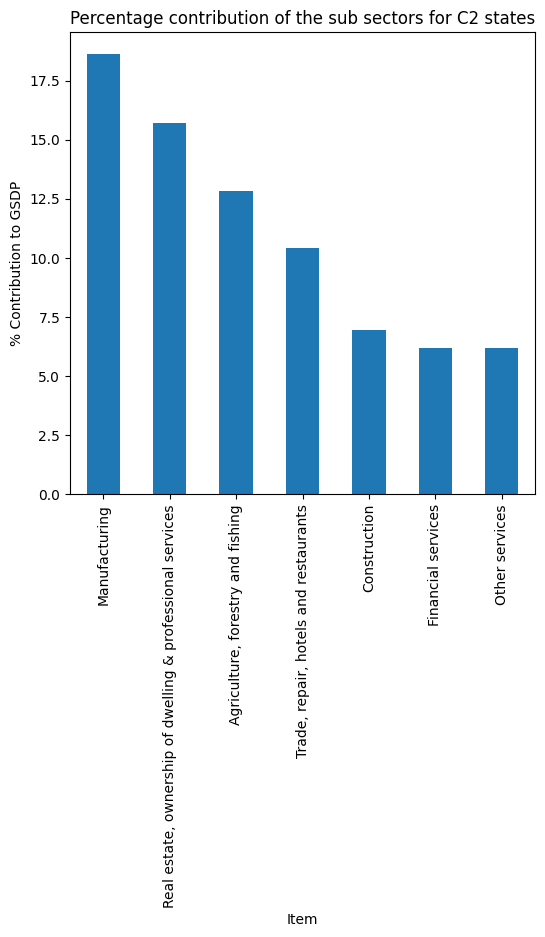

In [76]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C2 category states
df_state_C2['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C2 states')
plt.show()

# **C3 States**

In [77]:
# Creating dataframe for C3 states
# Taking only sub sectors columns and total GSDP
df_state_C3 = df_GSVA_all_states[df_GSVA_all_states['Category']=='C3']
df_state_C3 = df_state_C3[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C3

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
5,Odisha,6422978.0,2586328.0,5754229.0,833067.0,2402396.0,3149555.0,2034016.0,1065147.0,2348714.0,1318221.0,2340603.0,32197092.0
1,Meghalaya,366521.0,84529.0,433213.0,54473.0,150256.0,383974.0,148189.0,64091.0,150409.0,239782.0,214211.0,2440807.0
9,Tripura,799825.0,142391.0,228625.0,77870.0,177899.0,390423.0,155956.0,86094.0,190704.0,338244.0,323287.0,2966662.0
17,Rajasthan,15044394.0,4069385.0,6552580.0,1122888.0,5353326.0,7297290.0,3814461.0,1827413.0,6451997.0,2460364.0,4164287.0,61219447.0
24,Chhattisgarh,3948847.0,2451970.0,4370593.0,1198438.0,2669855.0,1535571.0,871770.0,739057.0,2462166.0,867982.0,1112232.0,23498180.0
3,Nagaland,607897.0,8280.0,18346.0,37944.0,156072.0,140781.0,77521.0,60393.0,159651.0,295424.0,259186.0,1841424.0
4,Mizoram,217010.0,8588.0,8479.0,128365.0,133228.0,114315.0,52587.0,23168.0,55068.0,206259.0,186222.0,1155933.0
18,Andhra_Pradesh,14819416.0,1484300.0,4672266.0,1151729.0,4664889.0,4233400.0,5076984.0,1900863.0,4405409.0,2200897.0,4215389.0,52646842.0


In [78]:
# Transposing 'df_state_C3'
df_state_C3 = df_state_C3.T
df_state_C3

,5,1,9,17,24,3,4,18
Item,,,,,,,,
State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Andhra_Pradesh
"Agriculture, forestry and fishing",6422978.0,366521.0,799825.0,15044394.0,3948847.0,607897.0,217010.0,14819416.0
Mining and quarrying,2586328.0,84529.0,142391.0,4069385.0,2451970.0,8280.0,8588.0,1484300.0
Manufacturing,5754229.0,433213.0,228625.0,6552580.0,4370593.0,18346.0,8479.0,4672266.0
"Electricity, gas, water supply & other utility services",833067.0,54473.0,77870.0,1122888.0,1198438.0,37944.0,128365.0,1151729.0
Construction,2402396.0,150256.0,177899.0,5353326.0,2669855.0,156072.0,133228.0,4664889.0
"Trade, repair, hotels and restaurants",3149555.0,383974.0,390423.0,7297290.0,1535571.0,140781.0,114315.0,4233400.0
"Transport, storage, communication & services related to broadcasting",2034016.0,148189.0,155956.0,3814461.0,871770.0,77521.0,52587.0,5076984.0
Financial services,1065147.0,64091.0,86094.0,1827413.0,739057.0,60393.0,23168.0,1900863.0


In [79]:
# Creating column header with States name
header = df_state_C3.iloc[0]
df_state_C3 = df_state_C3[1:]
df_state_C3.columns = header
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Andhra_Pradesh
Item,,,,,,,,
"Agriculture, forestry and fishing",6422978.0,366521.0,799825.0,15044394.0,3948847.0,607897.0,217010.0,14819416.0
Mining and quarrying,2586328.0,84529.0,142391.0,4069385.0,2451970.0,8280.0,8588.0,1484300.0
Manufacturing,5754229.0,433213.0,228625.0,6552580.0,4370593.0,18346.0,8479.0,4672266.0
"Electricity, gas, water supply & other utility services",833067.0,54473.0,77870.0,1122888.0,1198438.0,37944.0,128365.0,1151729.0
Construction,2402396.0,150256.0,177899.0,5353326.0,2669855.0,156072.0,133228.0,4664889.0
"Trade, repair, hotels and restaurants",3149555.0,383974.0,390423.0,7297290.0,1535571.0,140781.0,114315.0,4233400.0
"Transport, storage, communication & services related to broadcasting",2034016.0,148189.0,155956.0,3814461.0,871770.0,77521.0,52587.0,5076984.0
Financial services,1065147.0,64091.0,86094.0,1827413.0,739057.0,60393.0,23168.0,1900863.0
"Real estate, ownership of dwelling & professional services",2348714.0,150409.0,190704.0,6451997.0,2462166.0,159651.0,55068.0,4405409.0


In [80]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C3['Total'] = df_state_C3['Odisha']+df_state_C3['Meghalaya']+df_state_C3['Tripura']+df_state_C3['Rajasthan']+df_state_C3['Chhattisgarh']+df_state_C3['Nagaland']+df_state_C3['Mizoram']
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Andhra_Pradesh,Total
Item,,,,,,,,,
"Agriculture, forestry and fishing",6422978.0,366521.0,799825.0,15044394.0,3948847.0,607897.0,217010.0,14819416.0,27407472.0
Mining and quarrying,2586328.0,84529.0,142391.0,4069385.0,2451970.0,8280.0,8588.0,1484300.0,9351471.0
Manufacturing,5754229.0,433213.0,228625.0,6552580.0,4370593.0,18346.0,8479.0,4672266.0,17366065.0
"Electricity, gas, water supply & other utility services",833067.0,54473.0,77870.0,1122888.0,1198438.0,37944.0,128365.0,1151729.0,3453045.0
Construction,2402396.0,150256.0,177899.0,5353326.0,2669855.0,156072.0,133228.0,4664889.0,11043032.0
"Trade, repair, hotels and restaurants",3149555.0,383974.0,390423.0,7297290.0,1535571.0,140781.0,114315.0,4233400.0,13011909.0
"Transport, storage, communication & services related to broadcasting",2034016.0,148189.0,155956.0,3814461.0,871770.0,77521.0,52587.0,5076984.0,7154500.0
Financial services,1065147.0,64091.0,86094.0,1827413.0,739057.0,60393.0,23168.0,1900863.0,3865363.0
"Real estate, ownership of dwelling & professional services",2348714.0,150409.0,190704.0,6451997.0,2462166.0,159651.0,55068.0,4405409.0,11818709.0


In [81]:
# Converting all the columns data type to numeric
df_state_C3[df_state_C3.columns] = df_state_C3[df_state_C3.columns].apply(pd.to_numeric)
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP
df_state_C3['% Sub Sector Contribution'] = round(((df_state_C3['Total']/df_state_C3.at['Gross State Domestic Product','Total'])*100),2)
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Andhra_Pradesh,Total,% Sub Sector Contribution
Item,,,,,,,,,,
"Agriculture, forestry and fishing",6422978.0,366521.0,799825.0,15044394.0,3948847.0,607897.0,217010.0,14819416.0,27407472.0,21.87
Mining and quarrying,2586328.0,84529.0,142391.0,4069385.0,2451970.0,8280.0,8588.0,1484300.0,9351471.0,7.46
Manufacturing,5754229.0,433213.0,228625.0,6552580.0,4370593.0,18346.0,8479.0,4672266.0,17366065.0,13.86
"Electricity, gas, water supply & other utility services",833067.0,54473.0,77870.0,1122888.0,1198438.0,37944.0,128365.0,1151729.0,3453045.0,2.76
Construction,2402396.0,150256.0,177899.0,5353326.0,2669855.0,156072.0,133228.0,4664889.0,11043032.0,8.81
"Trade, repair, hotels and restaurants",3149555.0,383974.0,390423.0,7297290.0,1535571.0,140781.0,114315.0,4233400.0,13011909.0,10.38
"Transport, storage, communication & services related to broadcasting",2034016.0,148189.0,155956.0,3814461.0,871770.0,77521.0,52587.0,5076984.0,7154500.0,5.71
Financial services,1065147.0,64091.0,86094.0,1827413.0,739057.0,60393.0,23168.0,1900863.0,3865363.0,3.08
"Real estate, ownership of dwelling & professional services",2348714.0,150409.0,190704.0,6451997.0,2462166.0,159651.0,55068.0,4405409.0,11818709.0,9.43


In [82]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C3 = df_state_C3.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C3 = df_state_C3.drop('Gross State Domestic Product')
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Andhra_Pradesh,Total,% Sub Sector Contribution
Item,,,,,,,,,,
"Agriculture, forestry and fishing",6422978.0,366521.0,799825.0,15044394.0,3948847.0,607897.0,217010.0,14819416.0,27407472.0,21.87
Manufacturing,5754229.0,433213.0,228625.0,6552580.0,4370593.0,18346.0,8479.0,4672266.0,17366065.0,13.86
"Trade, repair, hotels and restaurants",3149555.0,383974.0,390423.0,7297290.0,1535571.0,140781.0,114315.0,4233400.0,13011909.0,10.38
"Real estate, ownership of dwelling & professional services",2348714.0,150409.0,190704.0,6451997.0,2462166.0,159651.0,55068.0,4405409.0,11818709.0,9.43
Construction,2402396.0,150256.0,177899.0,5353326.0,2669855.0,156072.0,133228.0,4664889.0,11043032.0,8.81
Mining and quarrying,2586328.0,84529.0,142391.0,4069385.0,2451970.0,8280.0,8588.0,1484300.0,9351471.0,7.46
Other services,2340603.0,214211.0,323287.0,4164287.0,1112232.0,259186.0,186222.0,4215389.0,8600028.0,6.86
"Transport, storage, communication & services related to broadcasting",2034016.0,148189.0,155956.0,3814461.0,871770.0,77521.0,52587.0,5076984.0,7154500.0,5.71
Public administration,1318221.0,239782.0,338244.0,2460364.0,867982.0,295424.0,206259.0,2200897.0,5726276.0,4.57


In [83]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C3['Top 80%'] = df_state_C3['% Sub Sector Contribution'].cumsum()
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Andhra_Pradesh,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,,,
"Agriculture, forestry and fishing",6422978.0,366521.0,799825.0,15044394.0,3948847.0,607897.0,217010.0,14819416.0,27407472.0,21.87,21.87
Manufacturing,5754229.0,433213.0,228625.0,6552580.0,4370593.0,18346.0,8479.0,4672266.0,17366065.0,13.86,35.73
"Trade, repair, hotels and restaurants",3149555.0,383974.0,390423.0,7297290.0,1535571.0,140781.0,114315.0,4233400.0,13011909.0,10.38,46.11
"Real estate, ownership of dwelling & professional services",2348714.0,150409.0,190704.0,6451997.0,2462166.0,159651.0,55068.0,4405409.0,11818709.0,9.43,55.54
Construction,2402396.0,150256.0,177899.0,5353326.0,2669855.0,156072.0,133228.0,4664889.0,11043032.0,8.81,64.35
Mining and quarrying,2586328.0,84529.0,142391.0,4069385.0,2451970.0,8280.0,8588.0,1484300.0,9351471.0,7.46,71.81
Other services,2340603.0,214211.0,323287.0,4164287.0,1112232.0,259186.0,186222.0,4215389.0,8600028.0,6.86,78.67
"Transport, storage, communication & services related to broadcasting",2034016.0,148189.0,155956.0,3814461.0,871770.0,77521.0,52587.0,5076984.0,7154500.0,5.71,84.38
Public administration,1318221.0,239782.0,338244.0,2460364.0,867982.0,295424.0,206259.0,2200897.0,5726276.0,4.57,88.95


In [84]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C3 = df_state_C3[df_state_C3['Top 80%'] < 80]
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Andhra_Pradesh,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,,,
"Agriculture, forestry and fishing",6422978.0,366521.0,799825.0,15044394.0,3948847.0,607897.0,217010.0,14819416.0,27407472.0,21.87,21.87
Manufacturing,5754229.0,433213.0,228625.0,6552580.0,4370593.0,18346.0,8479.0,4672266.0,17366065.0,13.86,35.73
"Trade, repair, hotels and restaurants",3149555.0,383974.0,390423.0,7297290.0,1535571.0,140781.0,114315.0,4233400.0,13011909.0,10.38,46.11
"Real estate, ownership of dwelling & professional services",2348714.0,150409.0,190704.0,6451997.0,2462166.0,159651.0,55068.0,4405409.0,11818709.0,9.43,55.54
Construction,2402396.0,150256.0,177899.0,5353326.0,2669855.0,156072.0,133228.0,4664889.0,11043032.0,8.81,64.35
Mining and quarrying,2586328.0,84529.0,142391.0,4069385.0,2451970.0,8280.0,8588.0,1484300.0,9351471.0,7.46,71.81
Other services,2340603.0,214211.0,323287.0,4164287.0,1112232.0,259186.0,186222.0,4215389.0,8600028.0,6.86,78.67


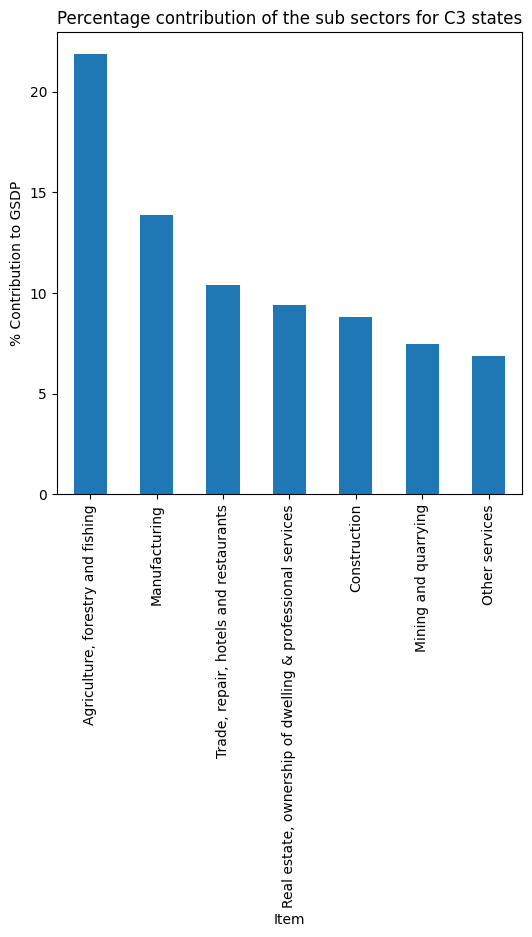

In [85]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C3 category states
df_state_C3['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C3 states')
plt.show()

# **C4 States**

In [86]:
# Creating dataframe for C4 states
# Taking only sub sectors columns and total GSDP
df_state_C4 = df_GSVA_all_states[df_GSVA_all_states['Category']=='C4']
df_state_C4 = df_state_C4[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C4

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
20,Bihar,7951890.0,68107.0,2189965.0,345168.0,3449763.0,7448373.0,3147173.0,1178022.0,3740641.0,2078171.0,4587589.0,37391988.0
11,Uttar_Pradesh,25097754.0,901501.0,12261649.0,2030625.0,11256450.0,9437243.0,7404509.0,3392275.0,14548185.0,6152124.0,5034623.0,104337115.0
0,Manipur,383140.0,NaN,49501.0,27490.0,143182.0,262950.0,109726.0,30315.0,159335.0,297078.0,317930.0,1804276.0
19,Assam,3855548.0,1471149.0,2002936.0,296587.0,1733568.0,2987155.0,1194568.0,543651.0,1412466.0,1373611.0,1795658.0,19809800.0
2,Jharkhand,3211065.0,2037289.0,4114148.0,337489.0,1789834.0,1991359.0,1470022.0,551441.0,1656784.0,1088325.0,1375410.0,21710718.0
7,Madhya_Pradesh,16235647.0,1618373.0,4368833.0,1272905.0,4403151.0,5357515.0,2865802.0,1988794.0,2660123.0,2497321.0,2747805.0,48198169.0


In [87]:
# Transposing 'df_state_C4'
df_state_C4 = df_state_C4.T
df_state_C4

,20,11,0,19,2,7
Item,,,,,,
State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh
"Agriculture, forestry and fishing",7951890.0,25097754.0,383140.0,3855548.0,3211065.0,16235647.0
Mining and quarrying,68107.0,901501.0,NaN,1471149.0,2037289.0,1618373.0
Manufacturing,2189965.0,12261649.0,49501.0,2002936.0,4114148.0,4368833.0
"Electricity, gas, water supply & other utility services",345168.0,2030625.0,27490.0,296587.0,337489.0,1272905.0
Construction,3449763.0,11256450.0,143182.0,1733568.0,1789834.0,4403151.0
"Trade, repair, hotels and restaurants",7448373.0,9437243.0,262950.0,2987155.0,1991359.0,5357515.0
"Transport, storage, communication & services related to broadcasting",3147173.0,7404509.0,109726.0,1194568.0,1470022.0,2865802.0
Financial services,1178022.0,3392275.0,30315.0,543651.0,551441.0,1988794.0


In [88]:
# Creating column header with States name
header = df_state_C4.iloc[0]
df_state_C4 = df_state_C4[1:]
df_state_C4.columns = header
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh
Item,,,,,,
"Agriculture, forestry and fishing",7951890.0,25097754.0,383140.0,3855548.0,3211065.0,16235647.0
Mining and quarrying,68107.0,901501.0,NaN,1471149.0,2037289.0,1618373.0
Manufacturing,2189965.0,12261649.0,49501.0,2002936.0,4114148.0,4368833.0
"Electricity, gas, water supply & other utility services",345168.0,2030625.0,27490.0,296587.0,337489.0,1272905.0
Construction,3449763.0,11256450.0,143182.0,1733568.0,1789834.0,4403151.0
"Trade, repair, hotels and restaurants",7448373.0,9437243.0,262950.0,2987155.0,1991359.0,5357515.0
"Transport, storage, communication & services related to broadcasting",3147173.0,7404509.0,109726.0,1194568.0,1470022.0,2865802.0
Financial services,1178022.0,3392275.0,30315.0,543651.0,551441.0,1988794.0
"Real estate, ownership of dwelling & professional services",3740641.0,14548185.0,159335.0,1412466.0,1656784.0,2660123.0


In [89]:
# There is a NaN value for Manipur Mining and quarrying sub sector
# Imputing it to 0
df_state_C4.at['Mining and quarrying','Manipur'] = 0
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C4['Total'] = df_state_C4['Bihar']+df_state_C4['Uttar_Pradesh']+df_state_C4['Manipur']+df_state_C4['Assam']+df_state_C4['Jharkhand']+df_state_C4['Madhya_Pradesh']
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total
Item,,,,,,,
"Agriculture, forestry and fishing",7951890.0,25097754.0,383140.0,3855548.0,3211065.0,16235647.0,56735044.0
Mining and quarrying,68107.0,901501.0,0,1471149.0,2037289.0,1618373.0,6096419.0
Manufacturing,2189965.0,12261649.0,49501.0,2002936.0,4114148.0,4368833.0,24987032.0
"Electricity, gas, water supply & other utility services",345168.0,2030625.0,27490.0,296587.0,337489.0,1272905.0,4310264.0
Construction,3449763.0,11256450.0,143182.0,1733568.0,1789834.0,4403151.0,22775948.0
"Trade, repair, hotels and restaurants",7448373.0,9437243.0,262950.0,2987155.0,1991359.0,5357515.0,27484595.0
"Transport, storage, communication & services related to broadcasting",3147173.0,7404509.0,109726.0,1194568.0,1470022.0,2865802.0,16191800.0
Financial services,1178022.0,3392275.0,30315.0,543651.0,551441.0,1988794.0,7684498.0
"Real estate, ownership of dwelling & professional services",3740641.0,14548185.0,159335.0,1412466.0,1656784.0,2660123.0,24177534.0


In [90]:
# Converting all the columns data type to numeric
df_state_C4[df_state_C4.columns] = df_state_C4[df_state_C4.columns].apply(pd.to_numeric)
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP
df_state_C4['% Sub Sector Contribution'] = round(((df_state_C4['Total']/df_state_C4.at['Gross State Domestic Product','Total'])*100),2)
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total,% Sub Sector Contribution
Item,,,,,,,,
"Agriculture, forestry and fishing",7951890.0,25097754.0,383140.0,3855548.0,3211065.0,16235647.0,56735044.0,24.32
Mining and quarrying,68107.0,901501.0,0.0,1471149.0,2037289.0,1618373.0,6096419.0,2.61
Manufacturing,2189965.0,12261649.0,49501.0,2002936.0,4114148.0,4368833.0,24987032.0,10.71
"Electricity, gas, water supply & other utility services",345168.0,2030625.0,27490.0,296587.0,337489.0,1272905.0,4310264.0,1.85
Construction,3449763.0,11256450.0,143182.0,1733568.0,1789834.0,4403151.0,22775948.0,9.76
"Trade, repair, hotels and restaurants",7448373.0,9437243.0,262950.0,2987155.0,1991359.0,5357515.0,27484595.0,11.78
"Transport, storage, communication & services related to broadcasting",3147173.0,7404509.0,109726.0,1194568.0,1470022.0,2865802.0,16191800.0,6.94
Financial services,1178022.0,3392275.0,30315.0,543651.0,551441.0,1988794.0,7684498.0,3.29
"Real estate, ownership of dwelling & professional services",3740641.0,14548185.0,159335.0,1412466.0,1656784.0,2660123.0,24177534.0,10.37


In [91]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C4 = df_state_C4.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C4 = df_state_C4.drop('Gross State Domestic Product')
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total,% Sub Sector Contribution
Item,,,,,,,,
"Agriculture, forestry and fishing",7951890.0,25097754.0,383140.0,3855548.0,3211065.0,16235647.0,56735044.0,24.32
"Trade, repair, hotels and restaurants",7448373.0,9437243.0,262950.0,2987155.0,1991359.0,5357515.0,27484595.0,11.78
Manufacturing,2189965.0,12261649.0,49501.0,2002936.0,4114148.0,4368833.0,24987032.0,10.71
"Real estate, ownership of dwelling & professional services",3740641.0,14548185.0,159335.0,1412466.0,1656784.0,2660123.0,24177534.0,10.37
Construction,3449763.0,11256450.0,143182.0,1733568.0,1789834.0,4403151.0,22775948.0,9.76
"Transport, storage, communication & services related to broadcasting",3147173.0,7404509.0,109726.0,1194568.0,1470022.0,2865802.0,16191800.0,6.94
Other services,4587589.0,5034623.0,317930.0,1795658.0,1375410.0,2747805.0,15859015.0,6.80
Public administration,2078171.0,6152124.0,297078.0,1373611.0,1088325.0,2497321.0,13486630.0,5.78
Financial services,1178022.0,3392275.0,30315.0,543651.0,551441.0,1988794.0,7684498.0,3.29


In [92]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C4['Top 80%'] = df_state_C4['% Sub Sector Contribution'].cumsum()
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,
"Agriculture, forestry and fishing",7951890.0,25097754.0,383140.0,3855548.0,3211065.0,16235647.0,56735044.0,24.32,24.32
"Trade, repair, hotels and restaurants",7448373.0,9437243.0,262950.0,2987155.0,1991359.0,5357515.0,27484595.0,11.78,36.10
Manufacturing,2189965.0,12261649.0,49501.0,2002936.0,4114148.0,4368833.0,24987032.0,10.71,46.81
"Real estate, ownership of dwelling & professional services",3740641.0,14548185.0,159335.0,1412466.0,1656784.0,2660123.0,24177534.0,10.37,57.18
Construction,3449763.0,11256450.0,143182.0,1733568.0,1789834.0,4403151.0,22775948.0,9.76,66.94
"Transport, storage, communication & services related to broadcasting",3147173.0,7404509.0,109726.0,1194568.0,1470022.0,2865802.0,16191800.0,6.94,73.88
Other services,4587589.0,5034623.0,317930.0,1795658.0,1375410.0,2747805.0,15859015.0,6.80,80.68
Public administration,2078171.0,6152124.0,297078.0,1373611.0,1088325.0,2497321.0,13486630.0,5.78,86.46
Financial services,1178022.0,3392275.0,30315.0,543651.0,551441.0,1988794.0,7684498.0,3.29,89.75


In [93]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C4 = df_state_C4[df_state_C4['Top 80%'] < 81]
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,
"Agriculture, forestry and fishing",7951890.0,25097754.0,383140.0,3855548.0,3211065.0,16235647.0,56735044.0,24.32,24.32
"Trade, repair, hotels and restaurants",7448373.0,9437243.0,262950.0,2987155.0,1991359.0,5357515.0,27484595.0,11.78,36.10
Manufacturing,2189965.0,12261649.0,49501.0,2002936.0,4114148.0,4368833.0,24987032.0,10.71,46.81
"Real estate, ownership of dwelling & professional services",3740641.0,14548185.0,159335.0,1412466.0,1656784.0,2660123.0,24177534.0,10.37,57.18
Construction,3449763.0,11256450.0,143182.0,1733568.0,1789834.0,4403151.0,22775948.0,9.76,66.94
"Transport, storage, communication & services related to broadcasting",3147173.0,7404509.0,109726.0,1194568.0,1470022.0,2865802.0,16191800.0,6.94,73.88
Other services,4587589.0,5034623.0,317930.0,1795658.0,1375410.0,2747805.0,15859015.0,6.80,80.68


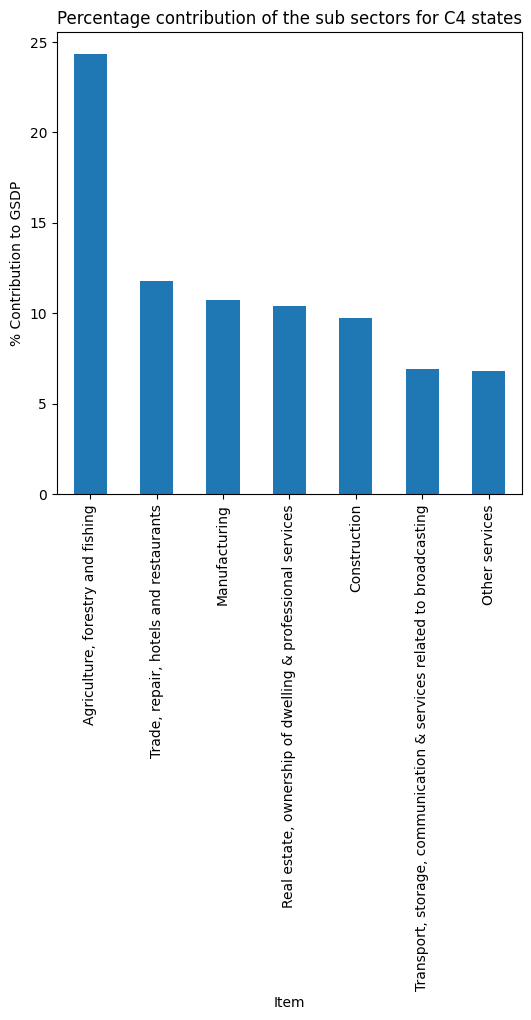

In [94]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C4 category states
df_state_C4['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C4 states')
plt.show()

# **The state wise GDP Distribution is:**
1.   C1 states total GDP = 101930677
2.   C2 states total GDP = 639027294
3.   C3 states total GDP = 125319545
4.   C4 states total GDP = 125319545



**We notice that the total GDP of C2 states is the highest, whereas total GDP of C1 states is the lowest. Because there are only 4 states come under C1 category. Also, though the per capita GDP is higher of these states, the total GDP is lower.**